#Analisis Data Jakevo DPMPTSP DKI Jakarta  

In [1]:
#Kita lakukan import library dari python sebagai alat bantu analisis data dan visualisasi data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import requests
import time

**Unggah Data Jakevo**

In [2]:
gsheetid = "12yguwOgQx1jKGzKeu9cML-B-oWXR6Gaq"
sheet_name = "Sheet1"
gsheet_url = f"https://docs.google.com/spreadsheets/d/{gsheetid}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
data_jakevo_2020 = pd.read_csv(gsheet_url)
data_jakevo_2020.head()

,wilayah_izin,kewenangan_up,nama_izin,tanggal_pengajuan,status
0,kelurahan,Kantor Lurah Jagakarsa,PELAYANAN ADMINISTRASI PTSP KELURAHAN SURAT PE...,4/7/2020,Draft
1,kelurahan,Kantor Lurah Kampung Melayu,IZIN PENGABUAN JENAZAH/KERANGKA,1/21/2020,Selesai
2,kota,Kantor Walikota Jakarta Barat,IZIN USAHA JASA KONSTRUKSI (BESAR/MENENGAH/KECIL),4/7/2020,Dihapus
3,kelurahan,Kantor Lurah Sukapura,PELAYANAN ADMINISTRASI PTSP KELURAHAN SURAT PE...,9/29/2020,Draft
4,kelurahan,Kantor Lurah Kota Bambu Selatan,PELAYANAN ADMINISTRASI PTSP KELURAHAN SURAT PE...,5/11/2020,Draft


In [3]:
gsheetid = "1uQz4U_u2UA0652lPmk0xGCurP2yt-zHz"
sheet_name = "Sheet1"
gsheet_url = f"https://docs.google.com/spreadsheets/d/{gsheetid}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
data_jakevo_2021 = pd.read_csv(gsheet_url)
data_jakevo_2021.head()

,wilayah_izin,kewenangan_up,nama_izin,tanggal_pengajuan,status
0,kelurahan,Kantor Lurah Malaka Sari,IZIN PENGGUNAAN TANAH MAKAM (MAKAM BARU/PERPAN...,12/14/2021,Draft
1,kelurahan,Kantor Lurah Gedong,SURAT TANDA REGISTRASI PEKERJA PROVINSI DKI JA...,7/6/2021,Draft
2,kelurahan,Kantor Lurah Ujung Menteng,SURAT TANDA REGISTRASI PEKERJA PROVINSI DKI JA...,7/21/2021,Draft
3,kelurahan,Kantor Lurah Grogol,SURAT TANDA REGISTRASI PEKERJA PROVINSI DKI JA...,7/21/2021,Draft
4,kelurahan,Kantor Lurah Senayan,SURAT TANDA REGISTRASI PEKERJA PROVINSI DKI JA...,7/21/2021,Draft


In [4]:
gsheetid = "1aJFrG7It4ivIbhY97dj4W3XbayJp4Jr0"
sheet_name = "Sheet1"
gsheet_url = f"https://docs.google.com/spreadsheets/d/{gsheetid}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
data_jakevo_2022 = pd.read_csv(gsheet_url)
data_jakevo_2022.head()

,wilayah_izin,kewenangan_up,nama_izin,tanggal_pengajuan,status
0,kelurahan,Kantor Lurah Pengadegan,PELAYANAN ADMINISTRASI PTSP KELURAHAN SURAT KE...,6/2/2022,Draft
1,kelurahan,Kantor Lurah Pegangsaan,PM1 Lurah/Camat - PELAYANAN ADMINISTRASI KELUR...,4/12/2022,Draft
2,kelurahan,Kantor Lurah Sukabumi Selatan,PM1 Lurah/Camat - SURAT PENGANTAR PERKAWINAN P...,10/28/2022,Draft
3,kelurahan,Kantor Lurah Tebet Barat,IZIN PENGGUNAAN TANAH MAKAM (MAKAM BARU/PERPAN...,8/22/2022,Dihapus
4,kelurahan,Kantor Lurah Kebagusan,PM1 Lurah/Camat - SURAT PENGANTAR PERKAWINAN P...,10/28/2022,Draft


In [5]:
gsheetid = "1OWJjDvMD3z9uJ9elR4gnP9LL8hDcy2Cp"
sheet_name = "Sheet1"
gsheet_url = f"https://docs.google.com/spreadsheets/d/{gsheetid}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
data_jakevo_2023 = pd.read_csv(gsheet_url)
data_jakevo_2023.head()

,wilayah_izin,kewenangan_up,nama_izin,tanggal_pengajuan,status
0,kelurahan,Kantor Lurah Tegal Alur,PELAYANAN ADMINISTRASI PTSP KELURAHAN - SURAT ...,4/11/2023,Draft
1,kelurahan,Kantor Lurah Setu,PM1 Lurah/Camat - SURAT PENGANTAR PERKAWINAN P...,3/7/2023,Draft
2,kelurahan,Kantor Lurah Kemanggisan,PM1 Lurah/Camat - SURAT PENGANTAR PERKAWINAN P...,10/2/2023,Draft
3,kelurahan,Kantor Lurah Galur,PELAYANAN ADMINISTRASI PTSP KELURAHAN SURAT KE...,4/11/2023,Selesai
4,kelurahan,Kantor Lurah Pisangan Timur,PELAYANAN ADMINISTRASI PTSP KELURAHAN SURAT KE...,9/29/2023,Selesai


In [6]:
gsheetid = "1Z2cIveKoEy38vL-LzVStgxMTlZ-ztg85"
sheet_name = "Sheet1"
gsheet_url = f"https://docs.google.com/spreadsheets/d/{gsheetid}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
data_jakevo_2024 = pd.read_csv(gsheet_url)
data_jakevo_2024.head()

,wilayah_izin,kewenangan_up,nama_izin,tanggal_pengajuan,status
0,kelurahan,Kantor Lurah Tebet Timur,PM1 Lurah/Camat - SURAT PENGANTAR PERKAWINAN P...,7/22/2024,Selesai
1,kelurahan,Kantor Lurah Kamal,IZIN PENGGUNAAN TANAH MAKAM (MAKAM BARU/PERPAN...,5/28/2024,Selesai
2,kelurahan,Kantor Lurah Penggilingan,KARTU PENCARI KERJA,1/25/2024,Selesai
3,kelurahan,Kantor Lurah Ciracas,IZIN PENGGUNAAN TANAH MAKAM (MAKAM BARU/PERPAN...,1/22/2024,Draft
4,kelurahan,Kantor Lurah Kelapa Dua,IZIN PENGGUNAAN TANAH MAKAM (MAKAM BARU/PERPAN...,3/5/2024,Selesai


In [7]:
# Menggabungkan data dari tahun 2020 sampai 2024 menjadi satu tabel
data_jakevo = pd.concat([data_jakevo_2020, data_jakevo_2021, data_jakevo_2022, data_jakevo_2023, data_jakevo_2024])
# data_jakevo = data_jakevo_2022

In [8]:
data_jakevo.sample(5)

,wilayah_izin,kewenangan_up,nama_izin,tanggal_pengajuan,status
41883,kelurahan,Kantor Lurah Bendungan Hilir,IZIN PENGGUNAAN TANAH MAKAM (MAKAM BARU/PERPAN...,4/22/2020,Draft
159582,kelurahan,Kantor Lurah Karet Semanggi,SURAT TANDA REGISTRASI PEKERJA PROVINSI DKI JA...,7/12/2021,Selesai
167215,kelurahan,Kantor Lurah Srengseng,PELAYANAN ADMINISTRASI PTSP KELURAHAN SURAT KE...,9/17/2020,Draft
232102,kelurahan,Kantor Lurah Kramatjati,PELAYANAN ADMINISTRASI PTSP KELURAHAN SURAT KE...,4/16/2024,Selesai
492005,kelurahan,Kantor Lurah Pondok Kelapa,PM1 Lurah/Camat - SURAT PENGANTAR PERKAWINAN K...,11/25/2023,Dihapus


In [9]:
data_jakevo[data_jakevo['tanggal_pengajuan'].isnull()]

,wilayah_izin,kewenangan_up,nama_izin,tanggal_pengajuan,status


In [10]:
data_jakevo[data_jakevo['wilayah_izin']==0]

,wilayah_izin,kewenangan_up,nama_izin,tanggal_pengajuan,status


In [11]:
data_jakevo['tanggal_pengajuan'].unique()

array(['4/7/2020', '1/21/2020', '9/29/2020', ..., '7/13/2024',
       '6/16/2024', '7/21/2024'], dtype=object)

In [12]:
data_jakevo['kewenangan_up'].duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
374009     True
374010     True
374011     True
374012     True
374013     True
Name: kewenangan_up, Length: 2496317, dtype: bool

In [13]:
data_jakevo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2496317 entries, 0 to 374013
Data columns (total 5 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   wilayah_izin       object
 1   kewenangan_up      object
 2   nama_izin          object
 3   tanggal_pengajuan  object
 4   status             object
dtypes: object(5)
memory usage: 114.3+ MB


In [14]:
#Mengubah bentuk tabel biasa menjadi tabel dataframe (Penting agar dapat memanipulasi dengan library pandas)
data_jakevo = pd.DataFrame(data_jakevo)

In [15]:
data_jakevo

,wilayah_izin,kewenangan_up,nama_izin,tanggal_pengajuan,status
0,kelurahan,Kantor Lurah Jagakarsa,PELAYANAN ADMINISTRASI PTSP KELURAHAN SURAT PE...,4/7/2020,Draft
1,kelurahan,Kantor Lurah Kampung Melayu,IZIN PENGABUAN JENAZAH/KERANGKA,1/21/2020,Selesai
2,kota,Kantor Walikota Jakarta Barat,IZIN USAHA JASA KONSTRUKSI (BESAR/MENENGAH/KECIL),4/7/2020,Dihapus
3,kelurahan,Kantor Lurah Sukapura,PELAYANAN ADMINISTRASI PTSP KELURAHAN SURAT PE...,9/29/2020,Draft
4,kelurahan,Kantor Lurah Kota Bambu Selatan,PELAYANAN ADMINISTRASI PTSP KELURAHAN SURAT PE...,5/11/2020,Draft
...,...,...,...,...,...
374009,kelurahan,Kantor Lurah Sunter Agung,PM1 Camat/ Lurah - SURAT KETERANGAN PENUNJUKAN...,7/4/2024,Draft
374010,kelurahan,Kantor Lurah Glodok,PM1 Lurah/Camat - SURAT PENGANTAR PERKAWINAN P...,5/15/2024,Selesai
374011,kelurahan,Kantor Lurah Penjaringan,PM1 Lurah/Camat - PELAYANAN ADMINISTRASI KELUR...,7/3/2024,Selesai
374012,kelurahan,Kantor Lurah Pulau Harapan,PM1 Camat/Lurah - SURAT KETERANGAN PENDAFTARAN...,7/5/2024,Draft


In [16]:
data_jakevo['tanggal_pengajuan']= pd.to_datetime(data_jakevo['tanggal_pengajuan'])

In [17]:
# membuat kolom baru bulan dari tanggal pengajuan

data_jakevo['bulan'] = data_jakevo['tanggal_pengajuan'].dt.strftime('%B')
data_jakevo['tahun'] = data_jakevo['tanggal_pengajuan'].dt.year
# data_jakevo = data_jakevo.drop(columns= ['tanggal_pengajuan'])

In [18]:
data_jakevo.sample(5)

,wilayah_izin,kewenangan_up,nama_izin,tanggal_pengajuan,status,bulan,tahun
106584,kelurahan,Kantor Lurah Kalideres,PELAYANAN ADMINISTRASI PTSP KELURAHAN SURAT PE...,2023-01-17,Selesai,January,2023
133157,kelurahan,Kantor Lurah Pondok Pinang,PM1 Lurah/Camat - SURAT PENGANTAR PERKAWINAN P...,2023-01-03,Draft,January,2023
613266,kelurahan,Kantor Lurah Cipinang Cempedak,PELAYANAN ADMINISTRASI PTSP KELURAHAN SURAT KE...,2021-07-26,Selesai,July,2021
210540,kelurahan,Kantor Lurah Bendungan Hilir,SURAT IZIN PRAKTIK PERAWAT (DI FASILITAS PELAY...,2022-08-10,Selesai,August,2022
578775,kelurahan,Kantor Lurah Cakung Timur,SURAT TANDA REGISTRASI PEKERJA PROVINSI DKI JA...,2021-07-19,Selesai,July,2021


In [19]:
bulan_urut = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


In [20]:
# kolom bulan dibuat jadi kategori agar biar bisa disortir sama panda

data_jakevo['bulan'] = pd.Categorical(data_jakevo['bulan'], categories=bulan_urut, ordered=True)

In [21]:
# membuat dataframe yang sudah diurutkan dari januari sampe desember

data_jakevo = data_jakevo.sort_values(by=['tahun', 'bulan'])

In [22]:
data_jakevo

,wilayah_izin,kewenangan_up,nama_izin,tanggal_pengajuan,status,bulan,tahun
1,kelurahan,Kantor Lurah Kampung Melayu,IZIN PENGABUAN JENAZAH/KERANGKA,2020-01-21,Selesai,January,2020
5,kelurahan,Kantor Lurah Pancoran,KARTU PENCARI KERJA,2020-01-21,Selesai,January,2020
10,kecamatan,Kantor Camat Cilandak,LAPORAN KEBERADAAN TENAGA KERJA ASING,2020-01-30,Selesai,January,2020
12,kecamatan,Kantor Camat Tanah Abang,LAPORAN KEBERADAAN TENAGA KERJA ASING,2020-01-16,Dihapus,January,2020
13,kelurahan,Kantor Lurah Kayu Putih,KARTU PENCARI KERJA,2020-01-21,Selesai,January,2020
...,...,...,...,...,...,...,...
374006,kelurahan,Kantor Lurah Pondok Ranggon,IZIN PENGGUNAAN TANAH MAKAM (MAKAM BARU/PERPAN...,2024-07-05,Selesai,July,2024
374009,kelurahan,Kantor Lurah Sunter Agung,PM1 Camat/ Lurah - SURAT KETERANGAN PENUNJUKAN...,2024-07-04,Draft,July,2024
374011,kelurahan,Kantor Lurah Penjaringan,PM1 Lurah/Camat - PELAYANAN ADMINISTRASI KELUR...,2024-07-03,Selesai,July,2024
374012,kelurahan,Kantor Lurah Pulau Harapan,PM1 Camat/Lurah - SURAT KETERANGAN PENDAFTARAN...,2024-07-05,Draft,July,2024


In [23]:
data_jakevo.isnull()

,wilayah_izin,kewenangan_up,nama_izin,tanggal_pengajuan,status,bulan,tahun
1,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False
13,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
374006,False,False,False,False,False,False,False
374009,False,False,False,False,False,False,False
374011,False,False,False,False,False,False,False
374012,False,False,False,False,False,False,False


In [24]:
data_jakevo = data_jakevo[data_jakevo['wilayah_izin'] != '\\b']
data_jakevo['wilayah_izin'].unique()

array(['kelurahan', 'kecamatan', 'kota', 'dinas'], dtype=object)

# Proses One Hot Encoding

In [25]:
status_encoded = pd.get_dummies(data_jakevo['status'], prefix='', prefix_sep='')

In [26]:
# Menggabungkan hasil encoding dengan DataFrame asli
data_jakevo_encoded = pd.concat([data_jakevo, status_encoded], axis=1)

In [27]:
 # drop status karena udah ga dipake
data_jakevo_encoded = data_jakevo_encoded.drop('status', axis=1)

In [28]:
data_jakevo_encoded

,wilayah_izin,kewenangan_up,nama_izin,tanggal_pengajuan,bulan,tahun,Dihapus,Dihapus System,Ditolak,Draft,Izin Dibatalkan Petugas,Nonaktif,Permohonan Dibatalkan,Selesai,Selesai Manual
1,kelurahan,Kantor Lurah Kampung Melayu,IZIN PENGABUAN JENAZAH/KERANGKA,2020-01-21,January,2020,False,False,False,False,False,False,False,True,False
5,kelurahan,Kantor Lurah Pancoran,KARTU PENCARI KERJA,2020-01-21,January,2020,False,False,False,False,False,False,False,True,False
10,kecamatan,Kantor Camat Cilandak,LAPORAN KEBERADAAN TENAGA KERJA ASING,2020-01-30,January,2020,False,False,False,False,False,False,False,True,False
12,kecamatan,Kantor Camat Tanah Abang,LAPORAN KEBERADAAN TENAGA KERJA ASING,2020-01-16,January,2020,True,False,False,False,False,False,False,False,False
13,kelurahan,Kantor Lurah Kayu Putih,KARTU PENCARI KERJA,2020-01-21,January,2020,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374006,kelurahan,Kantor Lurah Pondok Ranggon,IZIN PENGGUNAAN TANAH MAKAM (MAKAM BARU/PERPAN...,2024-07-05,July,2024,False,False,False,False,False,False,False,True,False
374009,kelurahan,Kantor Lurah Sunter Agung,PM1 Camat/ Lurah - SURAT KETERANGAN PENUNJUKAN...,2024-07-04,July,2024,False,False,False,True,False,False,False,False,False
374011,kelurahan,Kantor Lurah Penjaringan,PM1 Lurah/Camat - PELAYANAN ADMINISTRASI KELUR...,2024-07-03,July,2024,False,False,False,False,False,False,False,True,False
374012,kelurahan,Kantor Lurah Pulau Harapan,PM1 Camat/Lurah - SURAT KETERANGAN PENDAFTARAN...,2024-07-05,July,2024,False,False,False,True,False,False,False,False,False


In [29]:
data_jakevo_encoded['wilayah_izin'].unique()


array(['kelurahan', 'kecamatan', 'kota', 'dinas'], dtype=object)

In [30]:
data_jakevo_encoded['kewenangan_up'].nunique()

319

In [31]:
data_jakevo_encoded['nama_izin'].nunique()

475

In [32]:
# data_jakevo_encoded['nama_izin'].duplicated()

In [33]:
# 'Permohonan Tahapan Dibatalkan',

In [34]:
encoded_column = ['Dihapus',	'Dihapus System',	'Ditolak',	'Draft',	'Izin Dibatalkan Petugas',	'Nonaktif',	'Permohonan Dibatalkan',	'Selesai',	'Selesai Manual']

In [35]:
for i in encoded_column:
    data_jakevo_encoded[i]=data_jakevo_encoded[i].replace(True, 1).replace(False, 0)

/tmp/ipykernel_18/3333726391.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_jakevo_encoded[i]=data_jakevo_encoded[i].replace(True, 1).replace(False, 0)


Dihapus	Dihapus System	Ditolak	Draft	Izin Dibatalkan	Izin Dibatalkan Petugas	Nonaktif	Permohonan Dibatalkan	Permohonan Tahapan Dibatalkan	Selesai	Selesai Manual

In [36]:
data_jakevo_encoded

,wilayah_izin,kewenangan_up,nama_izin,tanggal_pengajuan,bulan,tahun,Dihapus,Dihapus System,Ditolak,Draft,Izin Dibatalkan Petugas,Nonaktif,Permohonan Dibatalkan,Selesai,Selesai Manual
1,kelurahan,Kantor Lurah Kampung Melayu,IZIN PENGABUAN JENAZAH/KERANGKA,2020-01-21,January,2020,0,0,0,0,0,0,0,1,0
5,kelurahan,Kantor Lurah Pancoran,KARTU PENCARI KERJA,2020-01-21,January,2020,0,0,0,0,0,0,0,1,0
10,kecamatan,Kantor Camat Cilandak,LAPORAN KEBERADAAN TENAGA KERJA ASING,2020-01-30,January,2020,0,0,0,0,0,0,0,1,0
12,kecamatan,Kantor Camat Tanah Abang,LAPORAN KEBERADAAN TENAGA KERJA ASING,2020-01-16,January,2020,1,0,0,0,0,0,0,0,0
13,kelurahan,Kantor Lurah Kayu Putih,KARTU PENCARI KERJA,2020-01-21,January,2020,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374006,kelurahan,Kantor Lurah Pondok Ranggon,IZIN PENGGUNAAN TANAH MAKAM (MAKAM BARU/PERPAN...,2024-07-05,July,2024,0,0,0,0,0,0,0,1,0
374009,kelurahan,Kantor Lurah Sunter Agung,PM1 Camat/ Lurah - SURAT KETERANGAN PENUNJUKAN...,2024-07-04,July,2024,0,0,0,1,0,0,0,0,0
374011,kelurahan,Kantor Lurah Penjaringan,PM1 Lurah/Camat - PELAYANAN ADMINISTRASI KELUR...,2024-07-03,July,2024,0,0,0,0,0,0,0,1,0
374012,kelurahan,Kantor Lurah Pulau Harapan,PM1 Camat/Lurah - SURAT KETERANGAN PENDAFTARAN...,2024-07-05,July,2024,0,0,0,1,0,0,0,0,0


In [37]:
# membuat tabel agregasi



# tabel_agregasi = data_jakevo.groupby(['nama_izin', 'bulan', 'tahun']).agg(
# tabel_agregasi = data_jakevo.groupby(['wilayah_izin', 'bulan', 'tahun']).agg(
tabel_agregasi = data_jakevo_encoded.groupby(['wilayah_izin','kewenangan_up','nama_izin','bulan','tahun']).agg(


# tabel_agregasi = data_jakevo.groupby(['nama_izin', 'bulan', 'tahun']).agg(
    Dihapus = ('Dihapus', 'sum'),
    Dihapus_System = ('Dihapus System', 'sum'),
    Ditolak = ('Ditolak', 'sum'),
    Draft = ('Draft', 'sum'),
    Izin_Dibatalkan_Petugas = ('Izin Dibatalkan Petugas', 'sum'),
    Nonaktif = ('Nonaktif', 'sum'),
     Permohonan_Dibatalkan = ('Permohonan Dibatalkan', 'sum'),
    Selesai = ('Selesai', 'sum'),
    Selesai_Manual = ('Selesai Manual', 'sum'),
)

/tmp/ipykernel_18/2181418530.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabel_agregasi = data_jakevo_encoded.groupby(['wilayah_izin','kewenangan_up','nama_izin','bulan','tahun']).agg(


In [38]:
tabel_agregasi

Dihapus  \
wilayah_izin kewenangan_up                 nama_izin                                          bulan    tahun            
dinas        BADAN PENGELOLAAN ASET DAERAH ARSIP - PM1 Lurah/Camat - SURAT DISPENSASI NIKAH   January  2020         0   
                                                                                                       2021         0   
                                                                                                       2022         0   
                                                                                                       2023         0   
                                                                                                       2024         0   
...                                                                                                               ...   
kota         Kantor Walikota Jakarta Utara VALIDASI PEMBAYARAN NOTIFIKASI PERPANJANGAN TEN... December 2020         0   
                                                                                                       2021         0   
                                                                                                       2022         0   
                                                                                                       2023         0   
                                                                                                       2024         0   

                                                                                                              Dihapus_System  \
wilayah_izin kewenangan_up                 nama_izin                                          bulan    tahun                   
dinas        BADAN PENGELOLAAN ASET DAERAH ARSIP - PM1 Lurah/Camat - SURAT DISPENSASI NIKAH   January  2020                0   
                                                                                                       2021                0   
                                                                                                       2022                0   
                                                                                                       2023                0   
                                                                                                       2024                0   
...                                                                                                                      ...   
kota         Kantor Walikota Jakarta Utara VALIDASI PEMBAYARAN NOTIFIKASI PERPANJANGAN TEN... December 2020                0   
                                                                                                       2021                0   
                                                                                                       2022                0   
                                                                                                       2023                0   
                                                                                                       2024                0   

                                                                                                              Ditolak  \
wilayah_izin kewenangan_up                 nama_izin                                          bulan    tahun            
dinas        BADAN PENGELOLAAN ASET DAERAH ARSIP - PM1 Lurah/Camat - SURAT DISPENSASI NIKAH   January  2020         0   
                                                                                                       2021         0   
                                                                                                       2022         0   
                                                                                                       2023         0   
                                                                                                       2024         0   
...                     

In [39]:
tabel_agregasi_izin = data_jakevo_encoded.groupby(['nama_izin','bulan','tahun']).agg(


    Dihapus = ('Dihapus', 'sum'),
    Dihapus_System = ('Dihapus System', 'sum'),
    Ditolak = ('Ditolak', 'sum'),
    Draft = ('Draft', 'sum'),
    Izin_Dibatalkan_Petugas = ('Izin Dibatalkan Petugas', 'sum'),
    Nonaktif = ('Nonaktif', 'sum'),
     Permohonan_Dibatalkan = ('Permohonan Dibatalkan', 'sum'),
    Selesai = ('Selesai', 'sum'),
    Selesai_Manual = ('Selesai Manual', 'sum'),
)

/tmp/ipykernel_18/3917958763.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabel_agregasi_izin = data_jakevo_encoded.groupby(['nama_izin','bulan','tahun']).agg(


In [40]:
tabel_agregasi_izin.head(5)

Dihapus  \
nama_izin                                        bulan   tahun            
ARSIP - PM1 Lurah/Camat - SURAT DISPENSASI NIKAH January 2020         0   
                                                         2021         0   
                                                         2022        12   
                                                         2023         0   
                                                         2024         1   

                                                                Dihapus_System  \
nama_izin                                        bulan   tahun                   
ARSIP - PM1 Lurah/Camat - SURAT DISPENSASI NIKAH January 2020                0   
                                                         2021                0   
                                                         2022                0   
                                                         2023                0   
                                                         2024                0   

                                                                Ditolak  \
nama_izin                                        bulan   tahun            
ARSIP - PM1 Lurah/Camat - SURAT DISPENSASI NIKAH January 2020         0   
                                                         2021         0   
                                                         2022         4   
                                                         2023         0   
                                                         2024         0   

                                                                Draft  \
nama_izin                                        bulan   tahun          
ARSIP - PM1 Lurah/Camat - SURAT DISPENSASI NIKAH January 2020       0   
                                                         2021       0   
                                                         2022       0   
                                                         2023       0   
                                                         2024       0   

                                                                Izin_Dibatalkan_Petugas  \
nama_izin                                        bulan   tahun                            
ARSIP - PM1 Lurah/Camat - SURAT DISPENSASI NIKAH January 2020                         0   
                                                         2021                         0   
                                                         2022                         0   
                                                         2023                         0   
                                                         2024                         0   

                                                                Nonaktif  \
nama_izin                                        bulan   tahun             
ARSIP - PM1 Lurah/Camat - SURAT DISPENSASI NIKAH January 2020          0   
                                                         2021          0   
                                                         2022          0   
                                                         2023          0   
                                                         2024          0   

                                                                Permohonan_Dibatalkan  \
nama_izin                                        bulan   tahun                          
ARSIP - PM1 Lurah/Camat - SURAT DISPENSASI NIKAH January 2020                       0   
                                                         2021                       0   
                                                         2022                       1   
                                                         2023                       0   
                                                         2024                       0   

                                                                Selesai  \
nama_izin                                        bulan 

In [41]:
tabel_agregasi_kewenangan = data_jakevo_encoded.groupby(['kewenangan_up','bulan','tahun']).agg(


# tabel_agregasi = data_jakevo.groupby(['nama_izin', 'bulan', 'tahun']).agg(
    Dihapus = ('Dihapus', 'sum'),
    Dihapus_System = ('Dihapus System', 'sum'),
    Ditolak = ('Ditolak', 'sum'),
    Draft = ('Draft', 'sum'),
    Izin_Dibatalkan_Petugas = ('Izin Dibatalkan Petugas', 'sum'),
    Nonaktif = ('Nonaktif', 'sum'),
     Permohonan_Dibatalkan = ('Permohonan Dibatalkan', 'sum'),
    Selesai = ('Selesai', 'sum'),
    Selesai_Manual = ('Selesai Manual', 'sum'),
)

/tmp/ipykernel_18/3481709793.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabel_agregasi_kewenangan = data_jakevo_encoded.groupby(['kewenangan_up','bulan','tahun']).agg(


In [42]:
tabel_agregasi_kewenangan.head()

Dihapus  Dihapus_System  Ditolak  \
kewenangan_up                 bulan   tahun                                     
BADAN PENGELOLAAN ASET DAERAH January 2020         0               0        0   
                                      2021         0               0        0   
                                      2022         0               0        0   
                                      2023         0               0        0   
                                      2024         0               0        0   

                                             Draft  Izin_Dibatalkan_Petugas  \
kewenangan_up                 bulan   tahun                                   
BADAN PENGELOLAAN ASET DAERAH January 2020       0                        0   
                                      2021       0                        0   
                                      2022       0                        0   
                                      2023       0                        0   
                                      2024       0                        0   

                                             Nonaktif  Permohonan_Dibatalkan  \
kewenangan_up                 bulan   tahun                                    
BADAN PENGELOLAAN ASET DAERAH January 2020          0                      0   
                                      2021          0                      0   
                                      2022          0                      0   
                                      2023          0                      0   
                                      2024          0                      0   

                                             Selesai  Selesai_Manual  
kewenangan_up                 bulan   tahun                           
BADAN PENGELOLAAN ASET DAERAH January 2020         0               0  
                                      2021         0               0  
                                      2022         0               0  
                                      2023         0               0  
                                      2024         0               0

In [43]:
# # EDA Menggunakan Boxplot
# plt.figure(figsize=(18,10))
# for i in range(0, len(encoded_column)):
#     plt.subplot(3, 5, i+1)
#     sns.boxplot(y = tabel_agregasi_per_bulan[encoded_column[i]], color='green', orient='v')
#     plt.tight_layout()

In [44]:
tabel_agregasi_wilayah = data_jakevo_encoded.groupby(['wilayah_izin','bulan','tahun']).agg(


# tabel_agregasi = data_jakevo.groupby(['nama_izin', 'bulan', 'tahun']).agg(
    Dihapus = ('Dihapus', 'sum'),
    Dihapus_System = ('Dihapus System', 'sum'),
    Ditolak = ('Ditolak', 'sum'),
    Draft = ('Draft', 'sum'),
     Izin_Dibatalkan_Petugas = ('Izin Dibatalkan Petugas', 'sum'),
    Nonaktif = ('Nonaktif', 'sum'),
     Permohonan_Dibatalkan = ('Permohonan Dibatalkan', 'sum'),
    Selesai = ('Selesai', 'sum'),
    Selesai_Manual = ('Selesai Manual', 'sum'),
)

tabel_agregasi_wilayah

/tmp/ipykernel_18/128723222.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabel_agregasi_wilayah = data_jakevo_encoded.groupby(['wilayah_izin','bulan','tahun']).agg(


Dihapus  Dihapus_System  Ditolak  Draft  \
wilayah_izin bulan    tahun                                            
dinas        January  2020        86               0        7      9   
                      2021       516               0       42     64   
                      2022       150               0       52     40   
                      2023       131               0       26    118   
                      2024       139               0       31     72   
...                              ...             ...      ...    ...   
kota         December 2020       332               1       63    176   
                      2021       401              45       91     49   
                      2022       336              20      104     52   
                      2023       129              14       82     27   
                      2024         0               0        0      0   

                             Izin_Dibatalkan_Petugas  Nonaktif  \
wilayah_izin bulan    tahun                                      
dinas        January  2020                         0         0   
                      2021                         0         5   
                      2022                         0        14   
                      2023                        10        34   
                      2024                        11        40   
...                                              ...       ...   
kota         December 2020                         0         7   
                      2021                         0       318   
                      2022                         2       478   
                      2023                         1        20   
                      2024                         0         0   

                             Permohonan_Dibatalkan  Selesai  Selesai_Manual  
wilayah_izin bulan    tahun                                                  
dinas        January  2020                       3       73               0  
                      2021                      74      186              47  
                      2022                      38      241              14  
                      2023                      24      261               0  
                      2024                      55      469               0  
...                                            ...      ...             ...  
kota         December 2020                     190      834               0  
                      2021                     129     1534              59  
                      2022                      92     1398               0  
                      2023                      91     1326               0  
                      2024                       0        0               0  

[240 rows x 9 columns]

In [45]:
tabel_agregasi_per_hari = data_jakevo_encoded.groupby(['tanggal_pengajuan','tahun']).agg(


# tabel_agregasi = data_jakevo.groupby(['nama_izin', 'bulan', 'tahun']).agg(
    Dihapus = ('Dihapus', 'sum'),
    Dihapus_System = ('Dihapus System', 'sum'),
    Ditolak = ('Ditolak', 'sum'),
    Draft = ('Draft', 'sum'),
     Izin_Dibatalkan_Petugas = ('Izin Dibatalkan Petugas', 'sum'),
    Nonaktif = ('Nonaktif', 'sum'),
     Permohonan_Dibatalkan = ('Permohonan Dibatalkan', 'sum'),
    Selesai = ('Selesai', 'sum'),
    Selesai_Manual = ('Selesai Manual', 'sum'),
)

In [46]:
tabel_agregasi_per_hari

,,Dihapus,Dihapus_System,Ditolak,Draft,Izin_Dibatalkan_Petugas,Nonaktif,Permohonan_Dibatalkan,Selesai,Selesai_Manual
tanggal_pengajuan,tahun,,,,,,,,,
2020-01-01,2020,10,0,0,0,0,0,1,1,0
2020-01-02,2020,83,0,5,5,0,15,12,119,0
2020-01-03,2020,107,0,10,4,0,15,13,127,0
2020-01-06,2020,183,0,14,8,0,22,25,202,0
2020-01-07,2020,159,0,13,13,0,11,29,278,0
...,...,...,...,...,...,...,...,...,...,...
2024-07-22,2024,147,0,63,1068,0,6,41,2098,0
2024-07-23,2024,127,0,45,970,0,3,32,1818,0
2024-07-24,2024,161,0,45,1085,0,3,26,1665,0


In [47]:
tabel_agregasi_per_hari.reset_index(inplace=True)

In [48]:
tabel_agregasi_per_hari

,tanggal_pengajuan,tahun,Dihapus,Dihapus_System,Ditolak,Draft,Izin_Dibatalkan_Petugas,Nonaktif,Permohonan_Dibatalkan,Selesai,Selesai_Manual
0,2020-01-01,2020,10,0,0,0,0,0,1,1,0
1,2020-01-02,2020,83,0,5,5,0,15,12,119,0
2,2020-01-03,2020,107,0,10,4,0,15,13,127,0
3,2020-01-06,2020,183,0,14,8,0,22,25,202,0
4,2020-01-07,2020,159,0,13,13,0,11,29,278,0
...,...,...,...,...,...,...,...,...,...,...,...
1637,2024-07-22,2024,147,0,63,1068,0,6,41,2098,0
1638,2024-07-23,2024,127,0,45,970,0,3,32,1818,0
1639,2024-07-24,2024,161,0,45,1085,0,3,26,1665,0
1640,2024-07-25,2024,91,0,43,1151,0,11,13,1444,0


In [49]:
tabel_agregasi_per_bulan = data_jakevo_encoded.groupby(['bulan','tahun']).agg(


# tabel_agregasi = data_jakevo.groupby(['nama_izin', 'bulan', 'tahun']).agg(
    Dihapus = ('Dihapus', 'sum'),
    Dihapus_System = ('Dihapus System', 'sum'),
    Ditolak = ('Ditolak', 'sum'),
    Draft = ('Draft', 'sum'),
     Izin_Dibatalkan_Petugas = ('Izin Dibatalkan Petugas', 'sum'),
    Nonaktif = ('Nonaktif', 'sum'),
     Permohonan_Dibatalkan = ('Permohonan Dibatalkan', 'sum'),
    Selesai = ('Selesai', 'sum'),
    Selesai_Manual = ('Selesai Manual', 'sum'),
)

/tmp/ipykernel_18/1347557076.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabel_agregasi_per_bulan = data_jakevo_encoded.groupby(['bulan','tahun']).agg(


In [50]:
tabel_agregasi_per_bulan

Dihapus  Dihapus_System  Ditolak   Draft  \
bulan     tahun                                             
January   2020      5208               8      480     160   
          2021      6014             107      866    2548   
          2022      3171              95      960    3735   
          2023      4601              67      991   11458   
          2024      5724              27     1065    9861   
February  2020      5852               7      521     162   
          2021      4384             100      956    3205   
          2022      2946              48      751    4030   
          2023      4237              66     1091   10561   
          2024      5542               4      994   10410   
March     2020      4610               9      542     312   
          2021      3738             121      923    2548   
          2022      3398              57      787    3483   
          2023      4529              49     1043   10408   
          2024      4654              10      981   11518   
April     2020      2543               7      322     704   
          2021      3123             114      757    1671   
          2022      2780              39      696    2515   
          2023      2813              35      590    6334   
          2024      3686               7      839   10424   
May       2020      2647              17      243     736   
          2021      4496            7465     3764    1261   
          2022      2048              17      535    2263   
          2023      5641             106     1110   13360   
          2024      5300             120     1106   14607   
June      2020     10430              63      633    2310   
          2021      3290              94      697    2891   
          2022      3675              24      874    3766   
          2023      4175              40      962   11277   
          2024      4264             115     1137   13494   
July      2020      7314              77      923    1771   
          2021     26183            7560     5637  110114   
          2022      3347              21      888    4488   
          2023      5059              55     1230   12453   
          2024      3668              87     1040   16356   
August    2020      5291              82      670    1687   
          2021      5043             141     1276   19722   
          2022      3240              24     1042    5320   
          2023      4968              72     1370   12917   
          2024         0               0        0       0   
September 2020      9083              95     1145    8263   
          2021      4929             189     1465   12002   
          2022      2897              46      975    5683   
          2023      5073              23     1344   10857   
          2024         0               0        0       0   
October   2020      5287              80      846    2679   
          2021      2658             271      950    2639   
          2022      3615              70      886    5828   
          2023      5019              24     1156   11011   
          2024         0               0        0       0   
November  2020      5329              79      970    1688   
          2021      2645             186      889    1933   
          2022      4500              83     1020    9608   
          2023      3966              23      915    8946   
          2024         0               0        0       0   
December  2020      3853              55      695    1303   
          2021      2966              82     1025    2699   
          2022      4416              61     1043    9715   
          2023      3157              21      831    7627   
          2024         0               0        0       0   

                 Izin_Dibatalkan_Petugas  Nonaktif  Permohonan_Dibatalkan  \
bulan     tahun                                                             
January   2020                         0       774                    756   
   

In [51]:
tabel_agregasi_per_bulan.reset_index(inplace=True)

In [52]:
tabel_agregasi_per_tahun = data_jakevo_encoded.groupby(['tahun']).agg(
      Dihapus = ('Dihapus', 'sum'),
    Dihapus_System = ('Dihapus System', 'sum'),
    Ditolak = ('Ditolak', 'sum'),
    Draft = ('Draft', 'sum'),
     Izin_Dibatalkan_Petugas = ('Izin Dibatalkan Petugas', 'sum'),
    Nonaktif = ('Nonaktif', 'sum'),
     Permohonan_Dibatalkan = ('Permohonan Dibatalkan', 'sum'),
    Selesai = ('Selesai', 'sum'),
    Selesai_Manual = ('Selesai Manual', 'sum'),
)


In [53]:
tabel_agregasi_per_tahun

,Dihapus,Dihapus_System,Ditolak,Draft,Izin_Dibatalkan_Petugas,Nonaktif,Permohonan_Dibatalkan,Selesai,Selesai_Manual
tahun,,,,,,,,,
2020,67447,579,7990,21775,1,6492,10602,127311,1
2021,69469,16430,19205,163233,11,9511,13613,722841,1844
2022,40033,585,10457,60434,13,10268,8813,210596,225
2023,53238,581,12633,127209,154,7541,7480,313603,23
2024,32838,370,7162,86670,102,1337,4532,241001,2


In [54]:
tabel_agregasi_per_tahun.reset_index(inplace=True)

In [55]:
tabel_agregasi_modus = data_jakevo_encoded.groupby(['wilayah_izin','kewenangan_up','nama_izin']).agg(


# tabel_agregasi = data_jakevo.groupby(['nama_izin', 'bulan', 'tahun']).agg(
    Dihapus = ('Dihapus', 'sum'),
    Dihapus_System = ('Dihapus System', 'sum'),
    Ditolak = ('Ditolak', 'sum'),
    Draft = ('Draft', 'sum'),
    Izin_Dibatalkan_Petugas = ('Izin Dibatalkan Petugas', 'sum'),
    Nonaktif = ('Nonaktif', 'sum'),
     Permohonan_Dibatalkan = ('Permohonan Dibatalkan', 'sum'),
    Selesai = ('Selesai', 'sum'),
    Selesai_Manual = ('Selesai Manual', 'sum'),
)

In [56]:
tabel_agregasi_modus

Dihapus  \
wilayah_izin kewenangan_up                 nama_izin                                                     
dinas        BADAN PENGELOLAAN ASET DAERAH IZIN LINGKUNGAN - ANALISIS MENGENAI DAMPAK (PER...        2   
                                           IZIN LINGKUNGAN - UPAYA PENGELOLAAN LINGKUNGAN ...        1   
                                           IZIN MENDIRIKAN BANGUNAN PRASARANA (INRIT)                2   
                                           IZIN MENDIRIKAN BANGUNAN PRASARANA (Jalan dan J...        3   
                                           IZIN PENEMPATAN PERANGKAT TELEKOMUNIKASI (IPPT)           0   
...                                                                                                ...   
kota         Kantor Walikota Jakarta Utara TATA LETAK BANGUNAN UNTUK BANGUNAN MENARA                19   
                                           TATA LETAK BANGUNAN UNTUK BANGUNAN REKLAME              144   
                                           Tanda Daftar Kapal Perikanan Andon < 30 GT                3   
                                           Tanda Daftar Kapal Perikanan untuk Nelayan Kecil          9   
                                           Tanda Daftar Keahlian Keselamatan Kebakaran               3   

                                                                                               Dihapus_System  \
wilayah_izin kewenangan_up                 nama_izin                                                            
dinas        BADAN PENGELOLAAN ASET DAERAH IZIN LINGKUNGAN - ANALISIS MENGENAI DAMPAK (PER...               0   
                                           IZIN LINGKUNGAN - UPAYA PENGELOLAAN LINGKUNGAN ...               0   
                                           IZIN MENDIRIKAN BANGUNAN PRASARANA (INRIT)                       0   
                                           IZIN MENDIRIKAN BANGUNAN PRASARANA (Jalan dan J...               0   
                                           IZIN PENEMPATAN PERANGKAT TELEKOMUNIKASI (IPPT)                  0   
...                                                                                                       ...   
kota         Kantor Walikota Jakarta Utara TATA LETAK BANGUNAN UNTUK BANGUNAN MENARA                        0   
                                           TATA LETAK BANGUNAN UNTUK BANGUNAN REKLAME                       0   
                                           Tanda Daftar Kapal Perikanan Andon < 30 GT                       0   
                                           Tanda Daftar Kapal Perikanan untuk Nelayan Kecil                 0   
                                           Tanda Daftar Keahlian Keselamatan Kebakaran                      0   

                                                                                               Ditolak  \
wilayah_izin kewenangan_up                 nama_izin                                                     
dinas        BADAN PENGELOLAAN ASET DAERAH IZIN LINGKUNGAN - ANALISIS MENGENAI DAMPAK (PER...        0   
                                           IZIN LINGKUNGAN - UPAYA PENGELOLAAN LINGKUNGAN ...        0   
                                           IZIN MENDIRIKAN BANGUNAN PRASARANA (INRIT)                0   
                                           IZIN MENDIRIKAN BANGUNAN PRASARANA (Jalan dan J...        0   
                                           IZIN PENEMPATAN PERANGKAT TELEKOMUNIKASI (IPPT)           0   
...                                                                                                ...   
kota         Kantor Walikota Jakarta Utara TATA LETAK BANGUNAN UNTUK BANGUNAN MENARA                 4   
                                           TATA LETAK BANGUNAN UNTUK BANGUNAN REKLAME               84   
                                           Tanda Daftar Kapal Perikanan Andon < 30 GT                0   
                                           Tanda Daftar Kapal Perikanan untuk Ne

In [57]:
tabel_agregasi_modus = tabel_agregasi_modus.reset_index()

In [58]:
def plot_tree_map(kolom):
    # Hitung nilai counts untuk setiap kategori
    tabel_tree = tabel_agregasi_modus[kolom].value_counts().reset_index()
    tabel_tree.columns = ['mode', 'count']
    
     
    # Filter hanya 10 terbesar
    tabel_tree_top10 = tabel_tree.nlargest(10, 'count')
    
    # Tambahkan kolom ranking
    tabel_tree_top10['rank'] = range(1, len(tabel_tree_top10) + 1)
    tabel_tree_top10['label'] = tabel_tree_top10['rank'].astype(str) + '. ' + tabel_tree_top10['mode']
    
    # Buat treemap
    fig = px.treemap(tabel_tree_top10, path=['label'],
                     values='count',
                     color='count',
                     color_continuous_scale='Viridis',
                     title=f'Top 10 {kolom} Treemap')
    
    # Update layout untuk memastikan label tampil
    fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
    fig.update_traces(textinfo='label+value+percent parent')
    
    fig.show()

In [59]:
plot_tree_map('kewenangan_up')

In [60]:
plot_tree_map('nama_izin')

In [61]:
plot_tree_map('wilayah_izin')

In [62]:
def plot_bar_chart(kolom):
    # Hitung nilai counts untuk setiap kategori
    tabel_tree = tabel_agregasi_modus[kolom].value_counts().reset_index()
    tabel_tree.columns = ['mode', 'count']
    
    # Filter hanya 10 terbesar
    tabel_tree_top10 = tabel_tree.nlargest(10, 'count')
    
    # Tambahkan kolom ranking
    tabel_tree_top10['rank'] = range(1, len(tabel_tree_top10) + 1)
    tabel_tree_top10['label'] = tabel_tree_top10['rank'].astype(str) + '. ' + tabel_tree_top10['mode']
    
    # Buat bar plot
    fig = px.bar(tabel_tree_top10, x='label', y='count', color='count',
                 color_continuous_scale='Viridis',
                 title=f'Top 10 {kolom} Bar Chart',
                 labels={'label': 'Category', 'count': 'Count'})
    
    # Update layout untuk memastikan label tampil
    fig.update_layout(margin=dict(t=50, l=25, r=25, b=25),
                      xaxis_title='Category',
                      yaxis_title='Count')
    
    fig.show()


In [63]:
plot_bar_chart('kewenangan_up')

In [64]:
plot_bar_chart('nama_izin')

In [65]:
plot_bar_chart('wilayah_izin')

In [66]:
encoded_column = ['Dihapus',	'Dihapus_System',	'Ditolak',	'Draft',	'Izin_Dibatalkan_Petugas',	'Nonaktif',	'Permohonan_Dibatalkan',	'Selesai',	'Selesai_Manual']

/tmp/ipykernel_18/726323182.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/tmp/ipykernel_18/726323182.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.githu

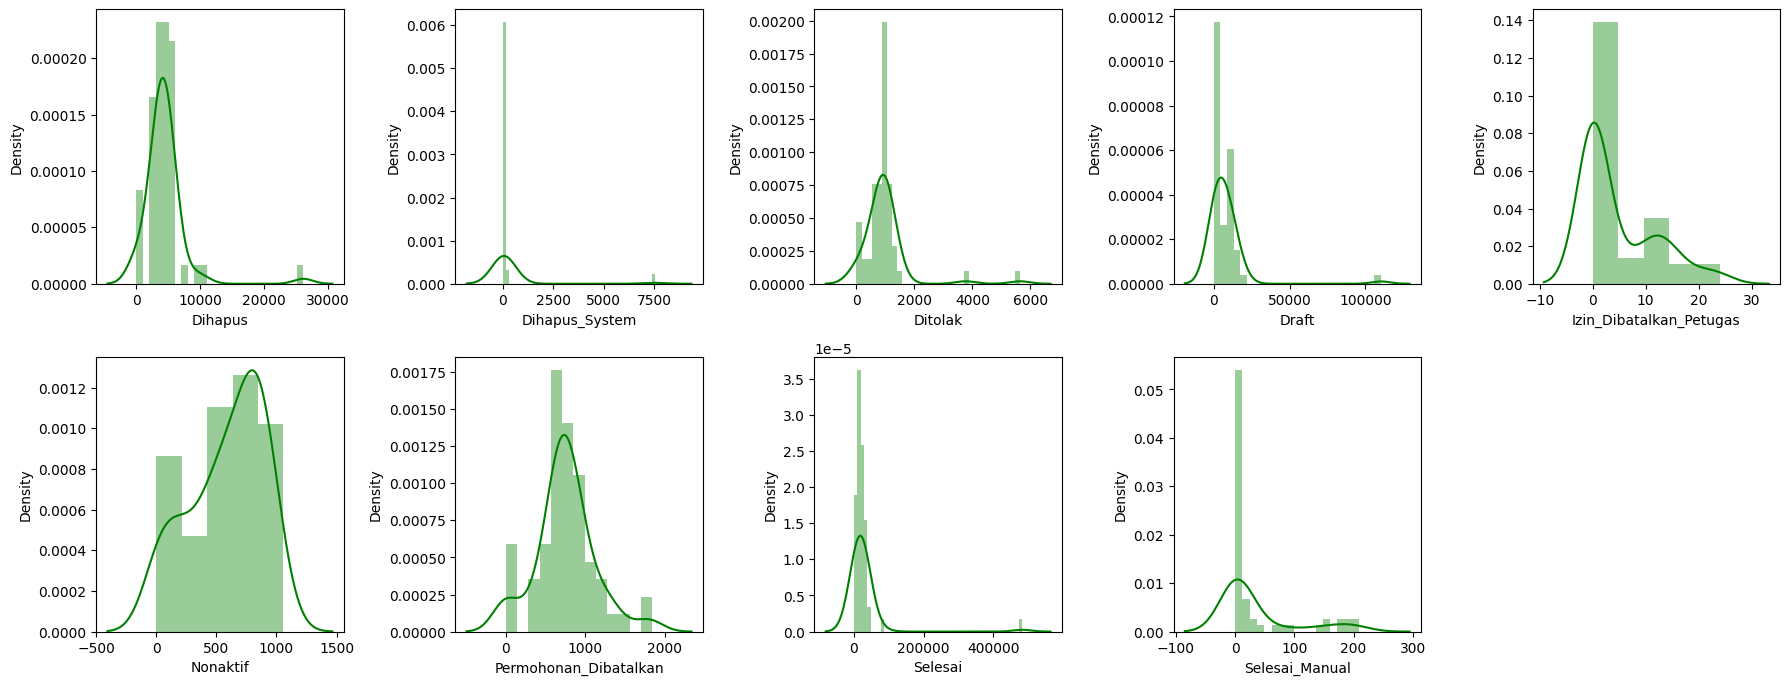

In [67]:
# EDA Menggunakan Histogram dan KDE plot
plt.figure(figsize=(18, 10))
for i in range(0, len(encoded_column)):
    plt.subplot(3, 5, i+1)
    sns.distplot(tabel_agregasi_per_bulan[encoded_column[i]], color='green', label=i)
    plt.tight_layout()

In [68]:
jakevo_encoded_clean = data_jakevo_encoded.copy()

In [69]:
data_jakevo_encoded.head(1)

,wilayah_izin,kewenangan_up,nama_izin,tanggal_pengajuan,bulan,tahun,Dihapus,Dihapus System,Ditolak,Draft,Izin Dibatalkan Petugas,Nonaktif,Permohonan Dibatalkan,Selesai,Selesai Manual
1,kelurahan,Kantor Lurah Kampung Melayu,IZIN PENGABUAN JENAZAH/KERANGKA,2020-01-21,January,2020,0,0,0,0,0,0,0,1,0


In [70]:
encoded_column = ['Dihapus',	'Dihapus System',	'Ditolak',	'Draft',	'Izin Dibatalkan Petugas',	'Nonaktif',	'Permohonan Dibatalkan',	'Selesai',	'Selesai Manual']

In [71]:
descriptive_stat_awal = jakevo_encoded_clean[encoded_column].describe()

In [72]:
descriptive_stat_awal = pd.DataFrame(descriptive_stat_awal)

In [73]:
#Membuat kolom range
descriptive_stat_awal.loc['Range'] = descriptive_stat_awal.loc['max'] - descriptive_stat_awal.loc['min']

In [74]:
#Membuat standar deviasi
descriptive_stat_awal.loc['Variance'] = descriptive_stat_awal.loc['std']**2

In [75]:
jakevo_encoded_clean[encoded_column].skew()

Dihapus                     2.570671
Dihapus System             11.472268
Ditolak                     6.362137
Draft                       1.631001
Izin Dibatalkan Petugas    94.236302
Nonaktif                    8.248248
Permohonan Dibatalkan       7.241651
Selesai                    -0.615693
Selesai Manual             34.475094
dtype: float64

In [76]:
jakevo_encoded_clean[encoded_column].kurt()

Dihapus                       4.608351
Dihapus System              129.613031
Ditolak                      38.476818
Draft                         0.660163
Izin Dibatalkan Petugas    8878.487649
Nonaktif                     66.033649
Permohonan Dibatalkan        50.441546
Selesai                      -1.620923
Selesai Manual             1186.533052
dtype: float64

Menjumlahkan seluruh kolom

In [77]:
data_jakevo_encoded['Total']=data_jakevo_encoded['Dihapus']+data_jakevo_encoded['Dihapus System']+data_jakevo_encoded['Ditolak']+data_jakevo_encoded['Draft']+data_jakevo_encoded['Izin Dibatalkan Petugas']+data_jakevo_encoded['Nonaktif']+data_jakevo_encoded['Permohonan Dibatalkan']+data_jakevo_encoded['Selesai']+data_jakevo_encoded['Selesai Manual']

In [78]:
tabel_agregasi_per_hari['Total']=tabel_agregasi_per_hari['Dihapus']+tabel_agregasi_per_hari['Dihapus_System']+tabel_agregasi_per_hari['Ditolak']+tabel_agregasi_per_hari['Draft']+tabel_agregasi_per_hari['Izin_Dibatalkan_Petugas']+tabel_agregasi_per_hari['Nonaktif']+tabel_agregasi_per_hari['Permohonan_Dibatalkan']+tabel_agregasi_per_hari['Selesai']+tabel_agregasi_per_hari['Selesai_Manual']

In [79]:
tabel_agregasi_per_bulan['Total']=tabel_agregasi_per_bulan['Dihapus']+tabel_agregasi_per_bulan['Dihapus_System']+tabel_agregasi_per_bulan['Ditolak']+tabel_agregasi_per_bulan['Draft']+tabel_agregasi_per_bulan['Izin_Dibatalkan_Petugas']+tabel_agregasi_per_bulan['Nonaktif']+tabel_agregasi_per_bulan['Permohonan_Dibatalkan']+tabel_agregasi_per_bulan['Selesai']+tabel_agregasi_per_bulan['Selesai_Manual']

In [80]:
tabel_agregasi_per_tahun['Total']=tabel_agregasi_per_tahun['Dihapus']+tabel_agregasi_per_tahun['Dihapus_System']+tabel_agregasi_per_tahun['Ditolak']+tabel_agregasi_per_tahun['Draft']+tabel_agregasi_per_tahun['Izin_Dibatalkan_Petugas']+tabel_agregasi_per_tahun['Nonaktif']+tabel_agregasi_per_tahun['Permohonan_Dibatalkan']+tabel_agregasi_per_tahun['Selesai']+tabel_agregasi_per_tahun['Selesai_Manual']

In [81]:
tabel_agregasi_per_tahun.reset_index(inplace=True)

In [82]:
tabel_agregasi_per_tahun

,index,tahun,Dihapus,Dihapus_System,Ditolak,Draft,Izin_Dibatalkan_Petugas,Nonaktif,Permohonan_Dibatalkan,Selesai,Selesai_Manual,Total
0,0,2020,67447,579,7990,21775,1,6492,10602,127311,1,242198
1,1,2021,69469,16430,19205,163233,11,9511,13613,722841,1844,1016157
2,2,2022,40033,585,10457,60434,13,10268,8813,210596,225,341424
3,3,2023,53238,581,12633,127209,154,7541,7480,313603,23,522462
4,4,2024,32838,370,7162,86670,102,1337,4532,241001,2,374014


In [83]:
data_jakevo_encoded

,wilayah_izin,kewenangan_up,nama_izin,tanggal_pengajuan,bulan,tahun,Dihapus,Dihapus System,Ditolak,Draft,Izin Dibatalkan Petugas,Nonaktif,Permohonan Dibatalkan,Selesai,Selesai Manual,Total
1,kelurahan,Kantor Lurah Kampung Melayu,IZIN PENGABUAN JENAZAH/KERANGKA,2020-01-21,January,2020,0,0,0,0,0,0,0,1,0,1
5,kelurahan,Kantor Lurah Pancoran,KARTU PENCARI KERJA,2020-01-21,January,2020,0,0,0,0,0,0,0,1,0,1
10,kecamatan,Kantor Camat Cilandak,LAPORAN KEBERADAAN TENAGA KERJA ASING,2020-01-30,January,2020,0,0,0,0,0,0,0,1,0,1
12,kecamatan,Kantor Camat Tanah Abang,LAPORAN KEBERADAAN TENAGA KERJA ASING,2020-01-16,January,2020,1,0,0,0,0,0,0,0,0,1
13,kelurahan,Kantor Lurah Kayu Putih,KARTU PENCARI KERJA,2020-01-21,January,2020,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374006,kelurahan,Kantor Lurah Pondok Ranggon,IZIN PENGGUNAAN TANAH MAKAM (MAKAM BARU/PERPAN...,2024-07-05,July,2024,0,0,0,0,0,0,0,1,0,1
374009,kelurahan,Kantor Lurah Sunter Agung,PM1 Camat/ Lurah - SURAT KETERANGAN PENUNJUKAN...,2024-07-04,July,2024,0,0,0,1,0,0,0,0,0,1
374011,kelurahan,Kantor Lurah Penjaringan,PM1 Lurah/Camat - PELAYANAN ADMINISTRASI KELUR...,2024-07-03,July,2024,0,0,0,0,0,0,0,1,0,1
374012,kelurahan,Kantor Lurah Pulau Harapan,PM1 Camat/Lurah - SURAT KETERANGAN PENDAFTARAN...,2024-07-05,July,2024,0,0,0,1,0,0,0,0,0,1


Ubah tanggal data per hari

In [84]:
tabel_agregasi_per_hari

,tanggal_pengajuan,tahun,Dihapus,Dihapus_System,Ditolak,Draft,Izin_Dibatalkan_Petugas,Nonaktif,Permohonan_Dibatalkan,Selesai,Selesai_Manual,Total
0,2020-01-01,2020,10,0,0,0,0,0,1,1,0,12
1,2020-01-02,2020,83,0,5,5,0,15,12,119,0,239
2,2020-01-03,2020,107,0,10,4,0,15,13,127,0,276
3,2020-01-06,2020,183,0,14,8,0,22,25,202,0,454
4,2020-01-07,2020,159,0,13,13,0,11,29,278,0,503
...,...,...,...,...,...,...,...,...,...,...,...,...
1637,2024-07-22,2024,147,0,63,1068,0,6,41,2098,0,3423
1638,2024-07-23,2024,127,0,45,970,0,3,32,1818,0,2995
1639,2024-07-24,2024,161,0,45,1085,0,3,26,1665,0,2985
1640,2024-07-25,2024,91,0,43,1151,0,11,13,1444,0,2753


Ubah tanggal data per bulan 

In [85]:
#Mengganti format bulan dari teks menjadi angka
tabel_agregasi_per_bulan['bulan'] = tabel_agregasi_per_bulan['bulan'].replace({'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12})
tabel_agregasi_per_bulan['tahun'] = tabel_agregasi_per_bulan['tahun'].astype(int)
#Membuat kolom tanggal dengan kolom bulan dan tahun
tabel_agregasi_per_bulan['Date'] = pd.to_datetime(tabel_agregasi_per_bulan['tahun'].astype(str) + '-' + tabel_agregasi_per_bulan['bulan'].astype(str) + '-01', format='%Y-%m-%d')

/tmp/ipykernel_18/2969639401.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipykernel_18/2969639401.py:2: FutureWarning:

The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.



In [86]:
#Mengganti format bulan dari teks menjadi angka
tabel_agregasi_per_tahun['tahun'] = tabel_agregasi_per_tahun['tahun'].astype(int)



In [87]:
from matplotlib.dates import MonthLocator
def plot_time_series(kolom_y):
    #Visualisasi tren pengajuan izin dari jan 2020-jul 2024
    plt.figure(figsize=(15,6))
    sns.lineplot(x='Date', y=kolom_y, data=tabel_agregasi_per_bulan)
    plt.xticks(rotation=25, ha='right', fontsize = 10)
    plt.title(f'Time Series Plot Seluruh Nama Izin per {kolom_y}  (Jan 2020 - Jul 2024)')
    # Set month locators for x-axis
    ax = plt.gca()
    ax.xaxis.set_major_locator(MonthLocator(bymonth=[ 2,  4,  6,  8,  10,  12]))

    plt.show()

Visualisasi per hari data jakevo

In [88]:
tabel_agregasi_per_hari

,tanggal_pengajuan,tahun,Dihapus,Dihapus_System,Ditolak,Draft,Izin_Dibatalkan_Petugas,Nonaktif,Permohonan_Dibatalkan,Selesai,Selesai_Manual,Total
0,2020-01-01,2020,10,0,0,0,0,0,1,1,0,12
1,2020-01-02,2020,83,0,5,5,0,15,12,119,0,239
2,2020-01-03,2020,107,0,10,4,0,15,13,127,0,276
3,2020-01-06,2020,183,0,14,8,0,22,25,202,0,454
4,2020-01-07,2020,159,0,13,13,0,11,29,278,0,503
...,...,...,...,...,...,...,...,...,...,...,...,...
1637,2024-07-22,2024,147,0,63,1068,0,6,41,2098,0,3423
1638,2024-07-23,2024,127,0,45,970,0,3,32,1818,0,2995
1639,2024-07-24,2024,161,0,45,1085,0,3,26,1665,0,2985
1640,2024-07-25,2024,91,0,43,1151,0,11,13,1444,0,2753


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



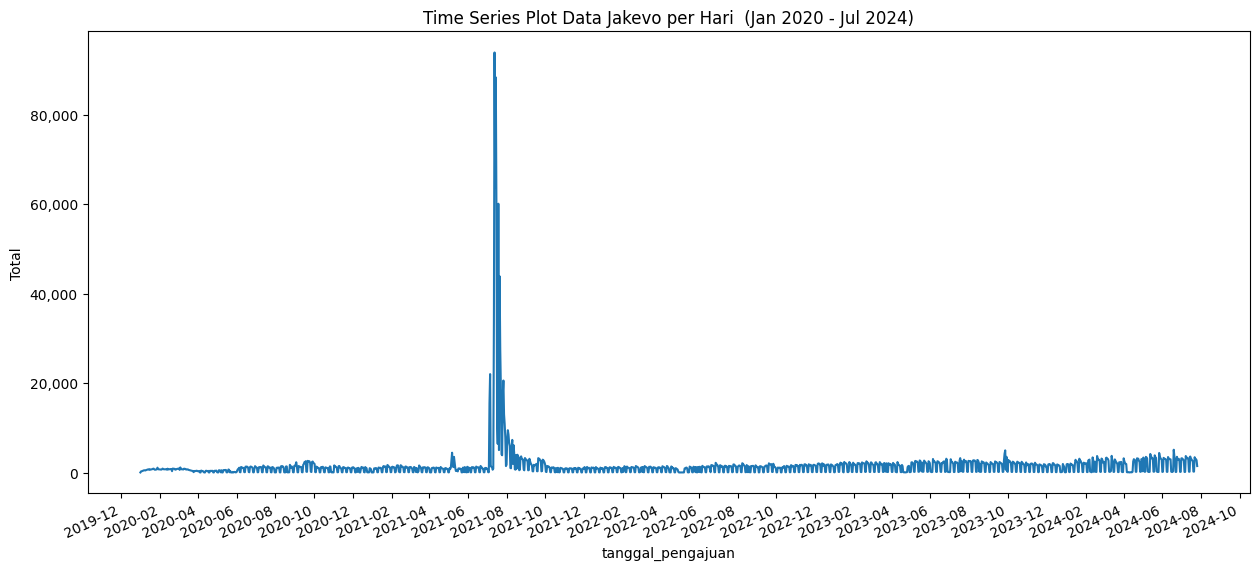

In [89]:
#Visualisasi tren data jakevo per hari dari jan 2020-jul 2024
plt.figure(figsize=(15,6))
sns.lineplot(x='tanggal_pengajuan', y='Total', data=tabel_agregasi_per_hari)
plt.xticks(rotation=25, ha='right', fontsize = 10)
plt.title('Time Series Plot Data Jakevo per Hari  (Jan 2020 - Jul 2024)')
# Set month locators for x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator(bymonth=[ 2,  4,  6,  8,  10,  12]))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()


Karena sulit melihat tren per hari maka dilakukan pengumpulan data per bulan

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



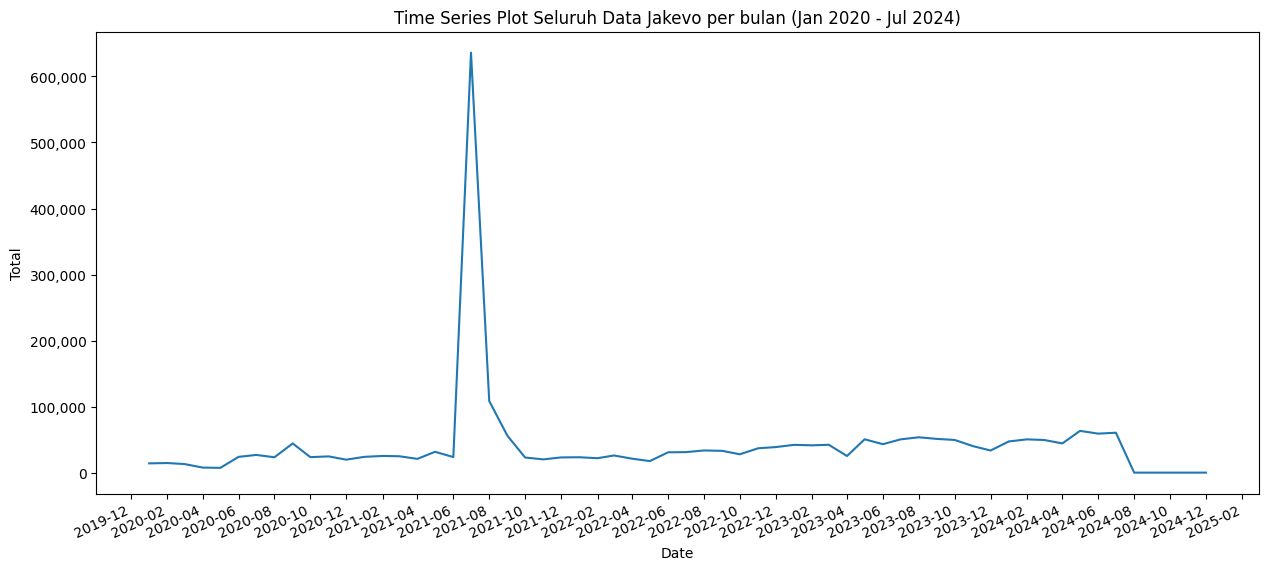

In [90]:
#Visualisasi trenjakevo  dari jan 2020-jul 2024
plt.figure(figsize=(15,6))
sns.lineplot(x='Date', y='Total', data=tabel_agregasi_per_bulan)
plt.xticks(rotation=25, ha='right', fontsize = 10)
plt.title('Time Series Plot Seluruh Data Jakevo per bulan (Jan 2020 - Jul 2024)')
# Set month locators for x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator(bymonth=[ 2,  4,  6,  8,  10,  12]))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()

dilakukan visualisasi time series per tahun

In [91]:
tabel_agregasi_per_tahun

,index,tahun,Dihapus,Dihapus_System,Ditolak,Draft,Izin_Dibatalkan_Petugas,Nonaktif,Permohonan_Dibatalkan,Selesai,Selesai_Manual,Total
0,0,2020,67447,579,7990,21775,1,6492,10602,127311,1,242198
1,1,2021,69469,16430,19205,163233,11,9511,13613,722841,1844,1016157
2,2,2022,40033,585,10457,60434,13,10268,8813,210596,225,341424
3,3,2023,53238,581,12633,127209,154,7541,7480,313603,23,522462
4,4,2024,32838,370,7162,86670,102,1337,4532,241001,2,374014


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



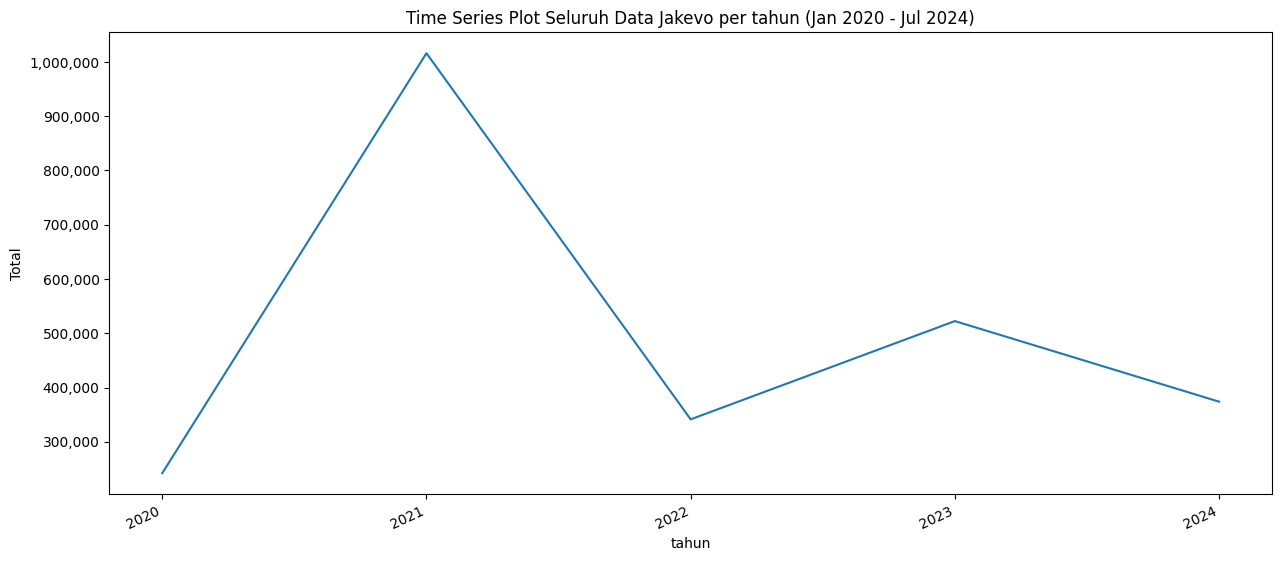

In [92]:
#Visualisasi trenjakevo per tahun dari jan 2020-jul 2024
# Per tahun
from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax = plt.figure(figsize=(15,6)).gca()

sns.lineplot(x='tahun', y='Total', data=tabel_agregasi_per_tahun)
plt.xticks(rotation=25, ha='right', fontsize = 10)
plt.title('Time Series Plot Seluruh Data Jakevo per tahun (Jan 2020 - Jul 2024)')

# Set year locators for x-axis
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()

In [93]:
agg_hari_2020  = tabel_agregasi_per_hari[tabel_agregasi_per_hari['tahun']==2020]
agg_hari_2021  = tabel_agregasi_per_hari[tabel_agregasi_per_hari['tahun']==2021]
agg_hari_2022  = tabel_agregasi_per_hari[tabel_agregasi_per_hari['tahun']==2022]
agg_hari_2023  = tabel_agregasi_per_hari[tabel_agregasi_per_hari['tahun']==2023]
agg_hari_2024  = tabel_agregasi_per_hari[tabel_agregasi_per_hari['tahun']==2024]

In [94]:
tabel_agregasi_per_hari

,tanggal_pengajuan,tahun,Dihapus,Dihapus_System,Ditolak,Draft,Izin_Dibatalkan_Petugas,Nonaktif,Permohonan_Dibatalkan,Selesai,Selesai_Manual,Total
0,2020-01-01,2020,10,0,0,0,0,0,1,1,0,12
1,2020-01-02,2020,83,0,5,5,0,15,12,119,0,239
2,2020-01-03,2020,107,0,10,4,0,15,13,127,0,276
3,2020-01-06,2020,183,0,14,8,0,22,25,202,0,454
4,2020-01-07,2020,159,0,13,13,0,11,29,278,0,503
...,...,...,...,...,...,...,...,...,...,...,...,...
1637,2024-07-22,2024,147,0,63,1068,0,6,41,2098,0,3423
1638,2024-07-23,2024,127,0,45,970,0,3,32,1818,0,2995
1639,2024-07-24,2024,161,0,45,1085,0,3,26,1665,0,2985
1640,2024-07-25,2024,91,0,43,1151,0,11,13,1444,0,2753


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



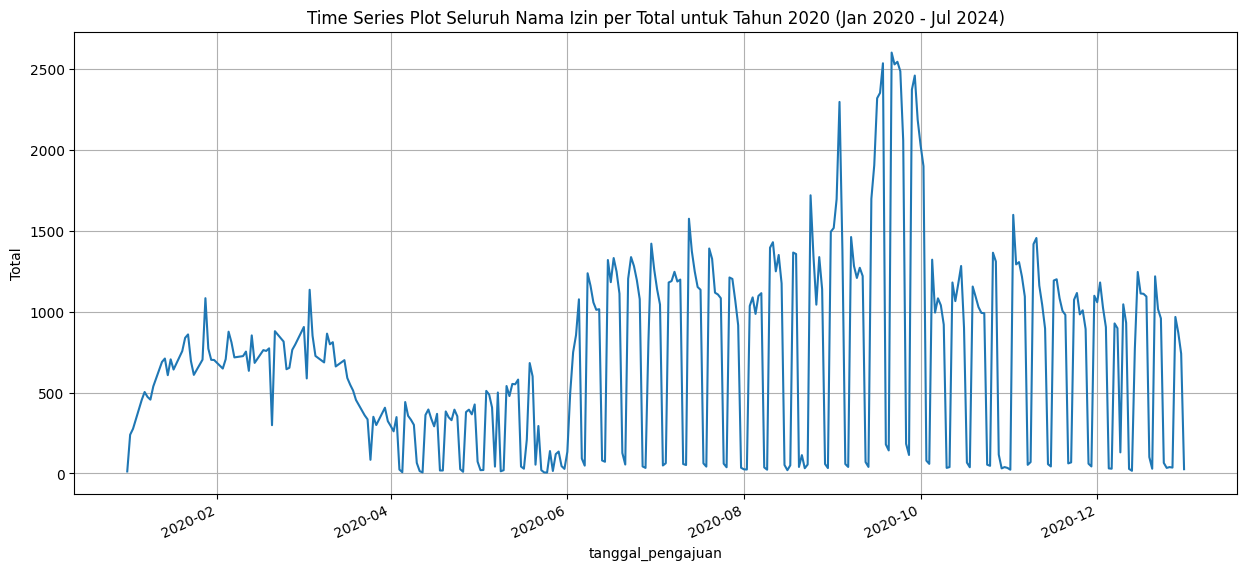

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



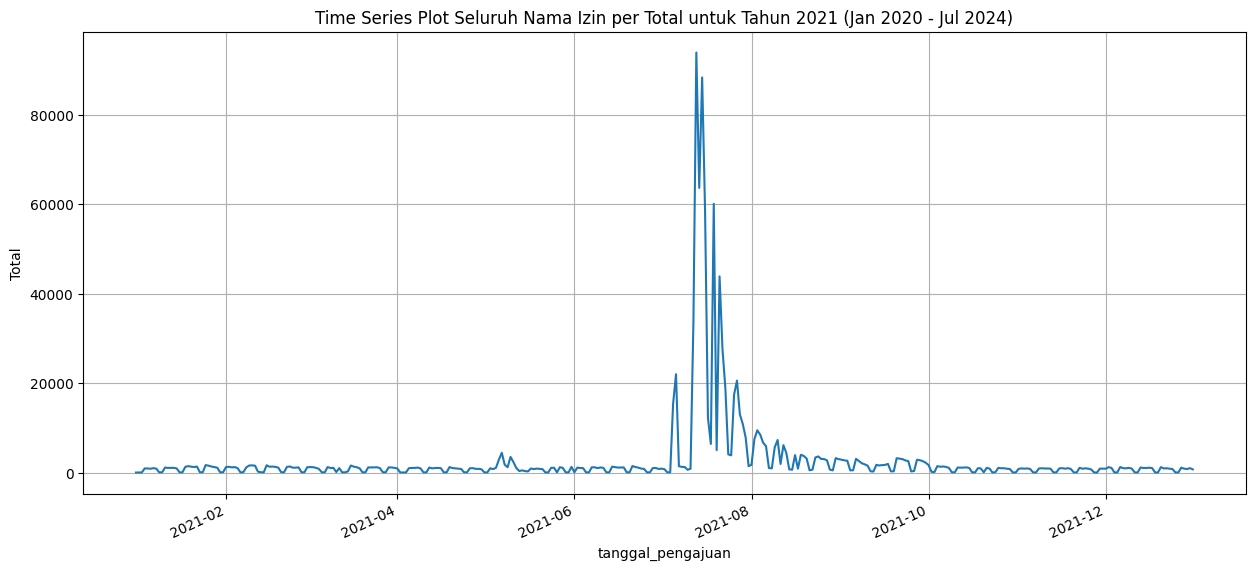

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



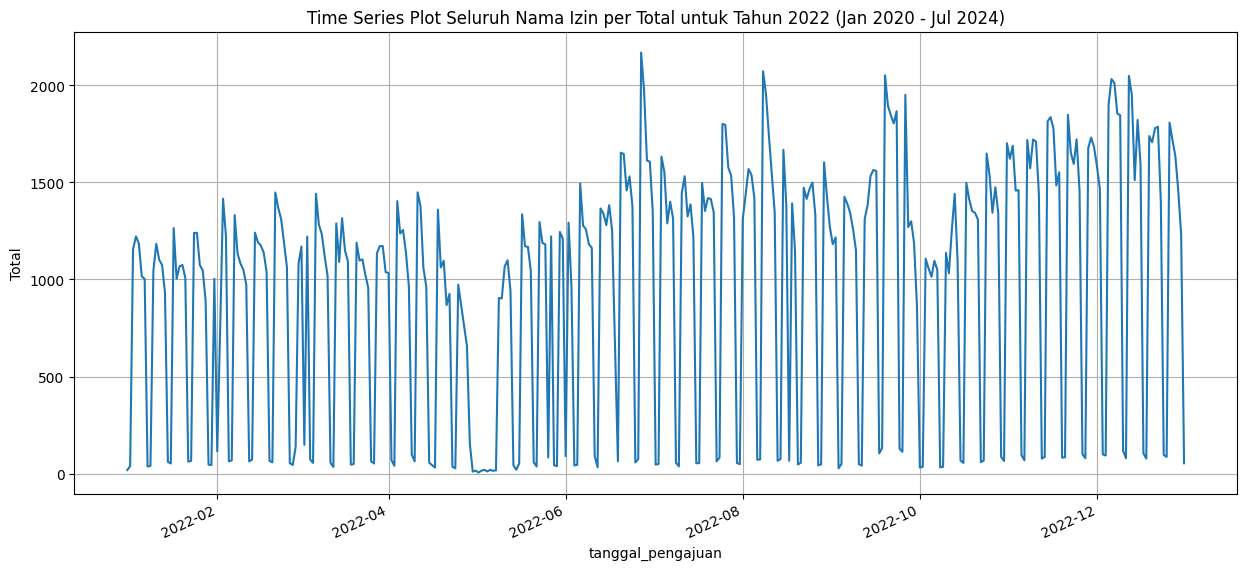

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



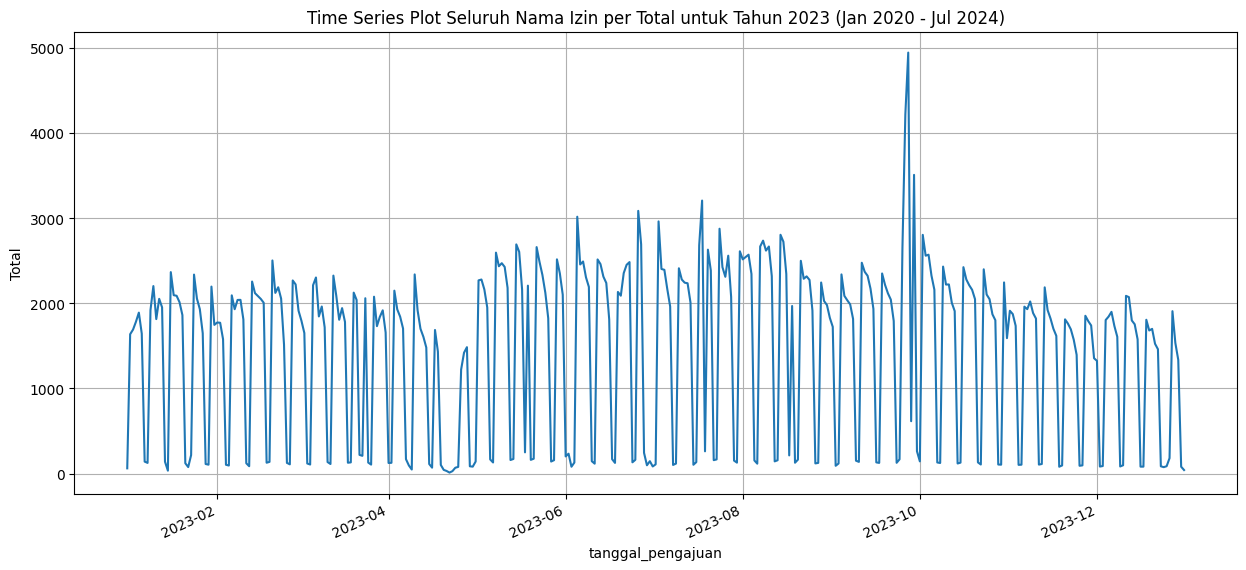

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



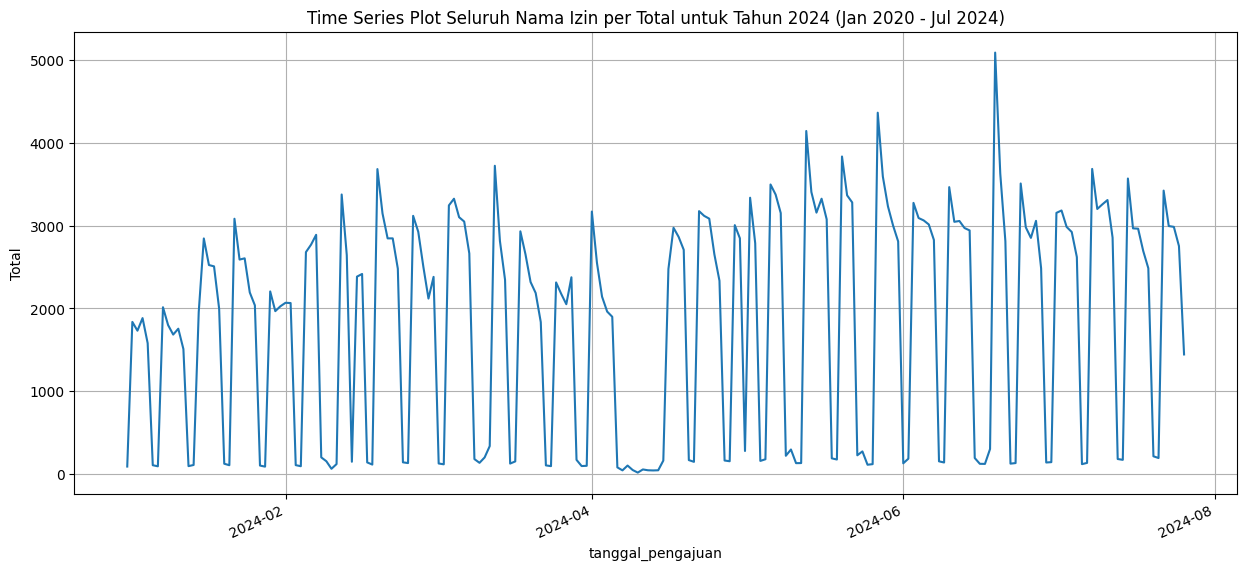

In [95]:
from matplotlib.dates import MonthLocator

def plot_time_series(kolom_y, data_agg, tahun):
    plt.figure(figsize=(15, 6))
    sns.lineplot(x='tanggal_pengajuan', y=kolom_y, data=data_agg)
    plt.xticks(rotation=25, ha='right', fontsize=10)
    plt.title(f'Time Series Plot Seluruh Nama Izin per {kolom_y} untuk Tahun {tahun} (Jan 2020 - Jul 2024)')
    plt.grid()
    # Set month locators for x-axis
    ax = plt.gca()
    ax.xaxis.set_major_locator(MonthLocator(bymonth=[2, 4, 6, 8, 10, 12]))
    plt.show()
    
    # List data dan tahun
data_agg_list = [agg_hari_2020, agg_hari_2021, agg_hari_2022, agg_hari_2023, agg_hari_2024]
tahun_list = [2020, 2021, 2022, 2023, 2024]
    
# Loop untuk plot time series setiap tahun
for data_agg, tahun in zip(data_agg_list, tahun_list):
    plot_time_series('Total', data_agg, tahun)


In [96]:
agg_bln_2020  = tabel_agregasi_per_bulan[tabel_agregasi_per_bulan['tahun']==2020]
agg_bln_2021  = tabel_agregasi_per_bulan[tabel_agregasi_per_bulan['tahun']==2021]
agg_bln_2022  = tabel_agregasi_per_bulan[tabel_agregasi_per_bulan['tahun']==2022]
agg_bln_2023  = tabel_agregasi_per_bulan[tabel_agregasi_per_bulan['tahun']==2023]
agg_bln_2024  = tabel_agregasi_per_bulan[tabel_agregasi_per_bulan['tahun']==2024]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



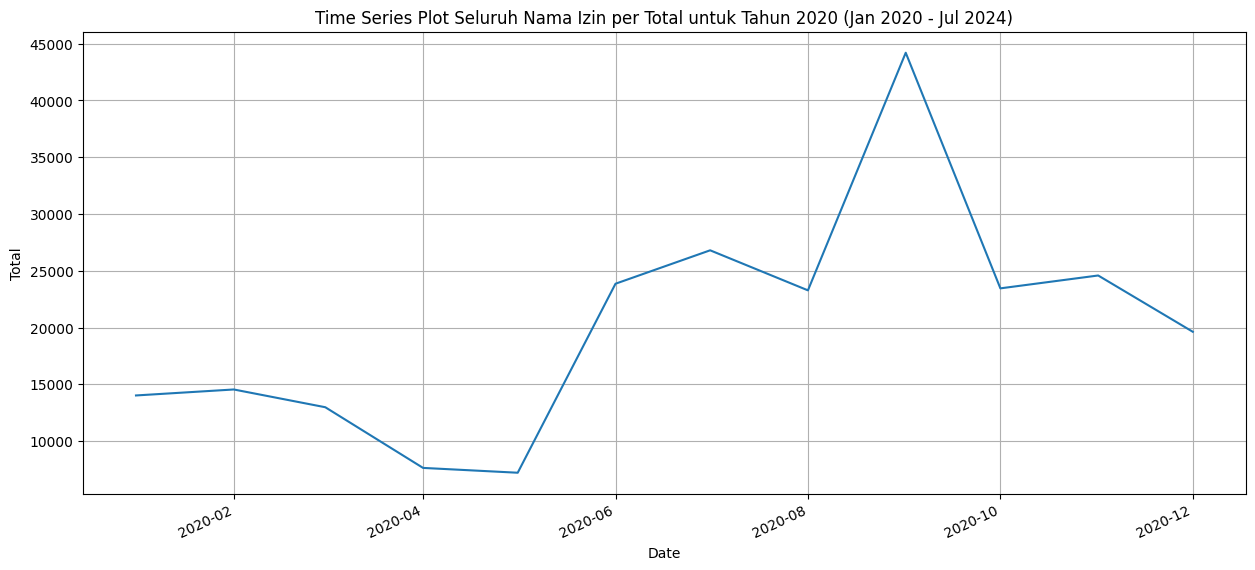

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



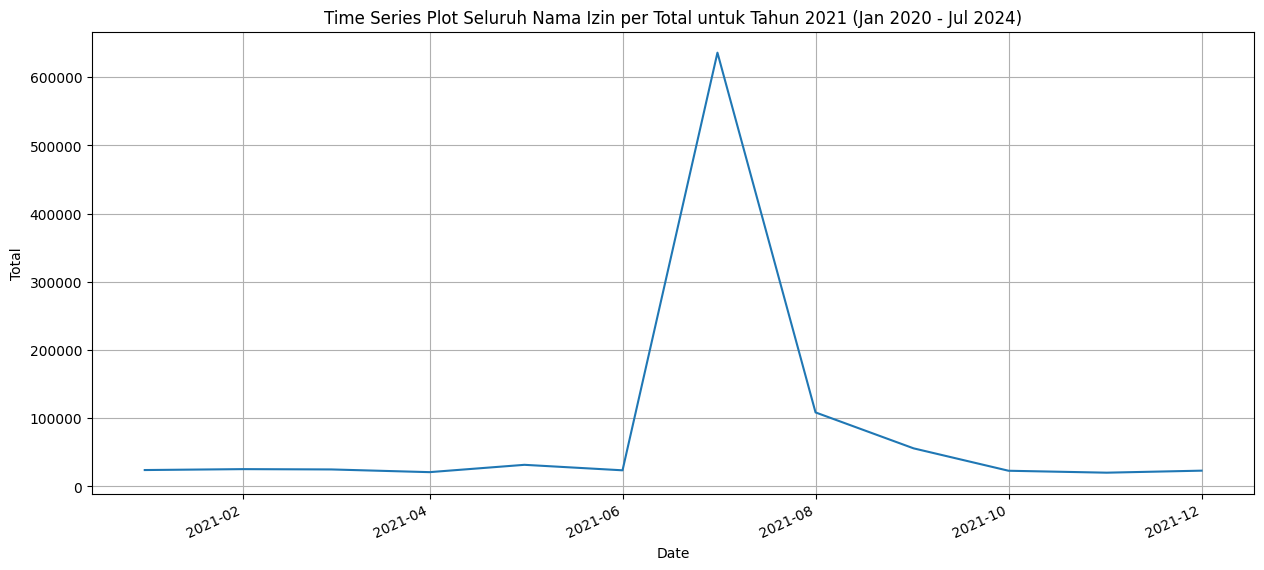

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



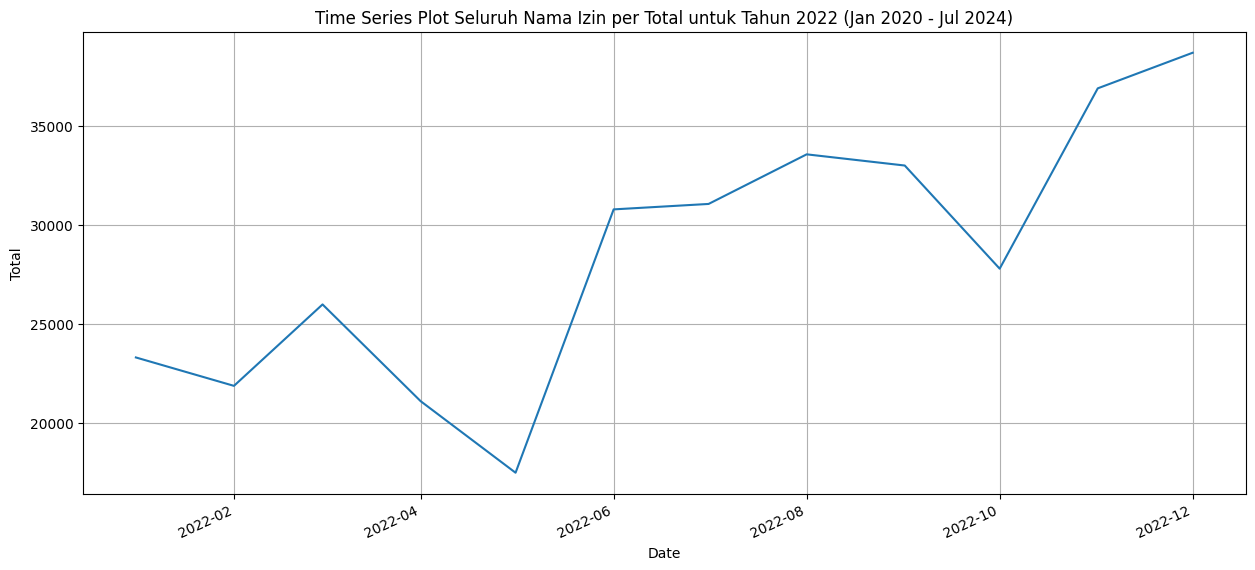

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



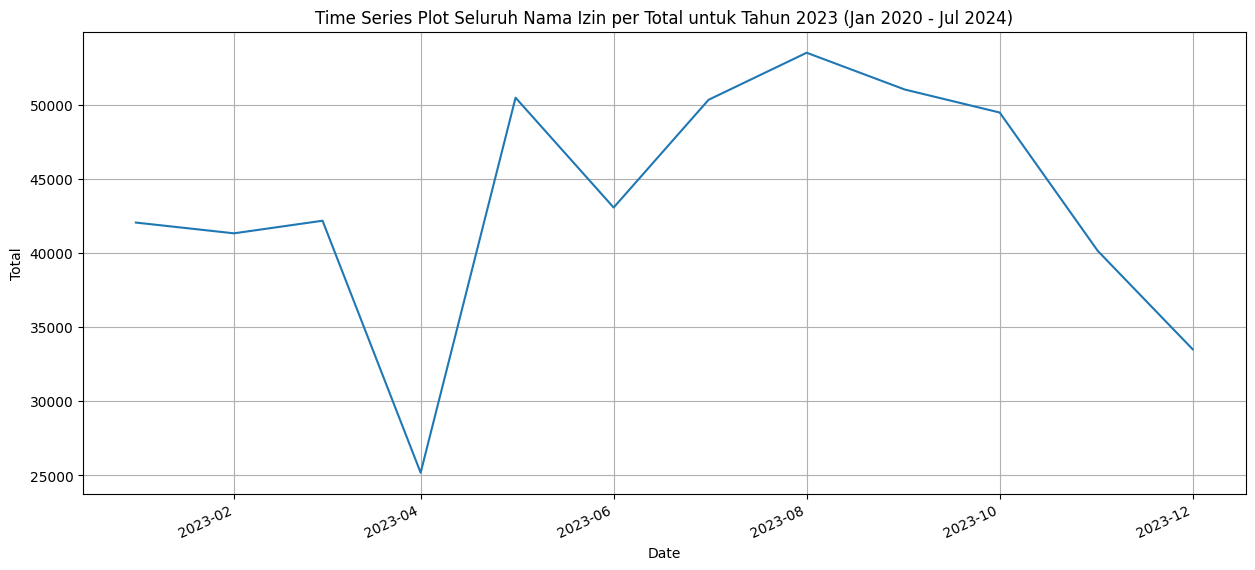

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



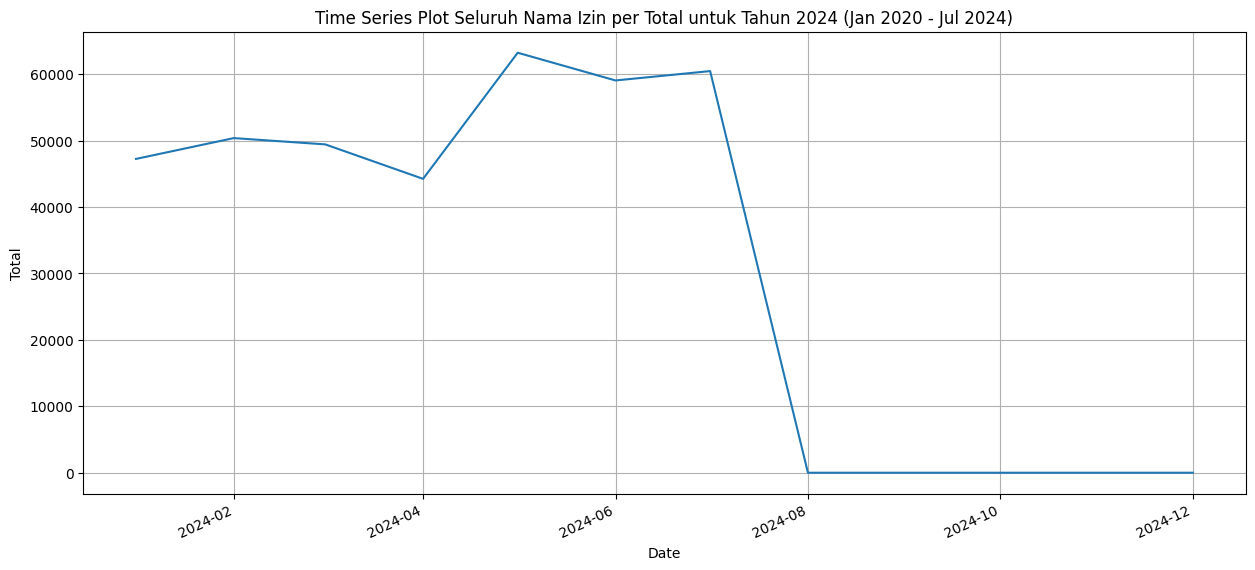

In [97]:
def plot_time_series(kolom_y, data_agg, tahun):
    plt.figure(figsize=(15, 6))
    sns.lineplot(x='Date', y=kolom_y, data=data_agg)
    plt.xticks(rotation=25, ha='right', fontsize=10)
    plt.title(f'Time Series Plot Seluruh Nama Izin per {kolom_y} untuk Tahun {tahun} (Jan 2020 - Jul 2024)')
    plt.grid()
    # Set month locators for x-axis
    ax = plt.gca()
    ax.xaxis.set_major_locator(MonthLocator(bymonth=[2, 4, 6, 8, 10, 12]))
    plt.show()

# List data dan tahun
data_agg_list_bln = [agg_bln_2020, agg_bln_2021, agg_bln_2022, agg_bln_2023, agg_bln_2024]
tahun_list_bln = [2020, 2021, 2022, 2023, 2024]
    
# Loop untuk plot time series setiap tahun
for data_agg, tahun in zip(data_agg_list_bln, tahun_list_bln):
    plot_time_series('Total', data_agg, tahun)


In [98]:
from matplotlib.dates import MonthLocator
def plot_time_series(kolom_y, data_agg):
    #Visualisasi tren pengajuan izin dari jan 2020-jul 2024
    plt.figure(figsize=(15,6))
    sns.lineplot(x='tanggal_pengajuan', y=kolom_y, data=data_agg)
    plt.xticks(rotation=25, ha='right', fontsize = 10)
    plt.title(f'Time Series Plot Seluruh Nama Izin per {kolom_y}  (Jan 2020 - Jul 2024)')
    # Set month locators for x-axis
    ax = plt.gca()
    ax.xaxis.set_major_locator(MonthLocator(bymonth=[ 2,  4,  6,  8,  10,  12]))

    plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



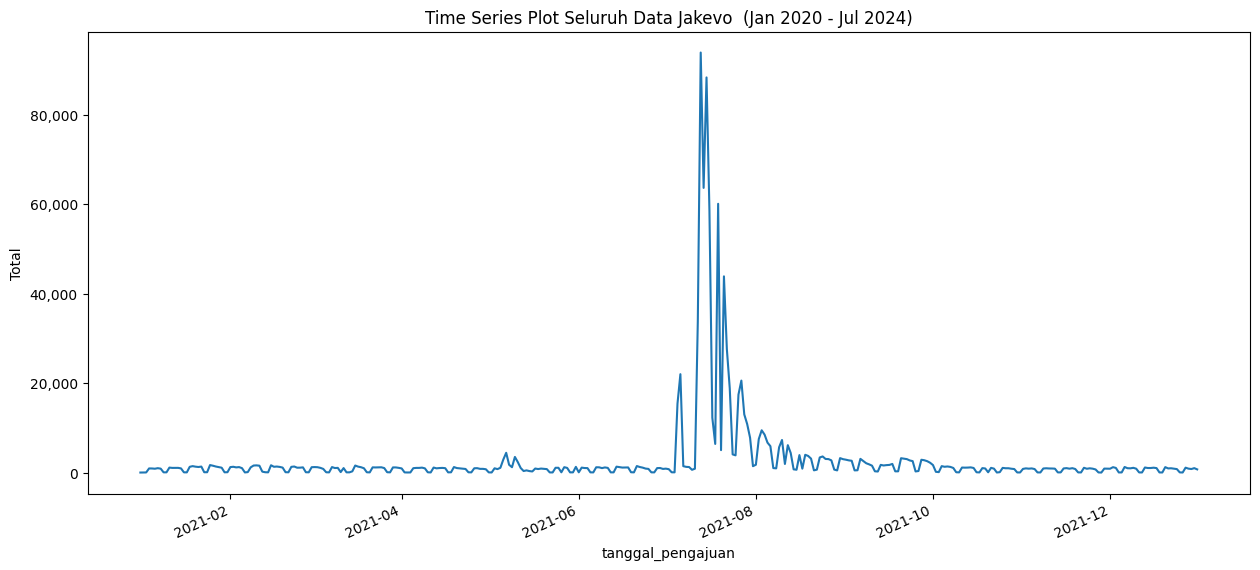

In [99]:
# Agregasi Per Hari
#Visualisasi trenjakevo  dari jan 2020-jul 2024
plt.figure(figsize=(15,6))
sns.lineplot(x='tanggal_pengajuan', y='Total', data=agg_hari_2021)
plt.xticks(rotation=25, ha='right', fontsize = 10)
plt.title('Time Series Plot Seluruh Data Jakevo  (Jan 2020 - Jul 2024)')
# Set month locators for x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator(bymonth=[ 2,  4,  6,  8,  10,  12]))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



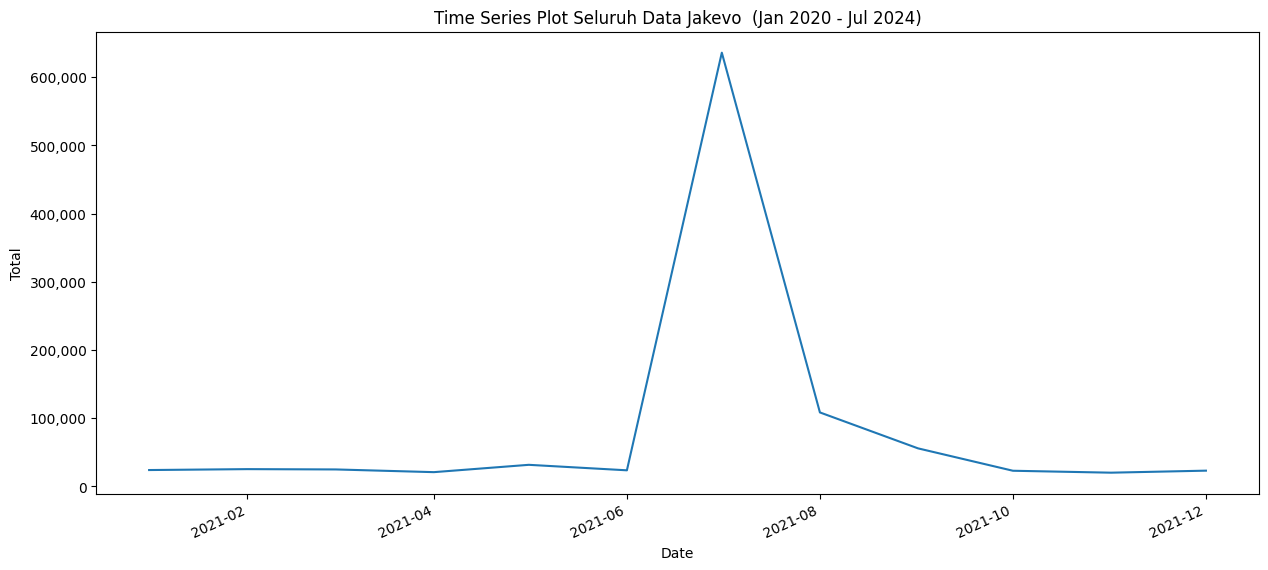

In [100]:
# Agregasi Per Bulan
#Visualisasi trenjakevo  dari jan 2020-jul 2024
plt.figure(figsize=(15,6))
sns.lineplot(x='Date', y='Total', data=agg_bln_2021)
plt.xticks(rotation=25, ha='right', fontsize = 10)
plt.title('Time Series Plot Seluruh Data Jakevo  (Jan 2020 - Jul 2024)')
# Set month locators for x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator(bymonth=[ 2,  4,  6,  8,  10,  12]))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()

In [101]:
plot_time_series('Dihapus')

TypeError: plot_time_series() missing 1 required positional argument: 'data_agg'

In [ ]:
plot_time_series('Dihapus_System')

In [ ]:
plot_time_series('Ditolak')

In [ ]:
plot_time_series('Draft')

In [ ]:
plot_time_series('Izin_Dibatalkan_Petugas')

In [ ]:
plot_time_series('Nonaktif')

In [ ]:
plot_time_series('Permohonan_Dibatalkan')

In [ ]:
plot_time_series('Selesai')

In [ ]:
plot_time_series('Selesai_Manual')

In [ ]:
df_agregasi = pd.DataFrame(tabel_agregasi)

# Menggunakan Nominatim geocoder
geolocator = Nominatim(user_agent="geoapiExercises")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)


In [ ]:
df_agregasi 

In [ ]:
df_agregasi.reset_index()

In [ ]:
data_jakevo

In [ ]:
def get_coordinates_nominatim(address):
    url = f'https://nominatim.openstreetmap.org/search?q={address}&format=json&limit=1'
    try:
        response = requests.get(url, timeout=10)  # Menambahkan timeout yang lebih lama
        response.raise_for_status()  # Munculkan error jika permintaan gagal
        data = response.json()
        if data:
            return (data[0]['lat'], data[0]['lon'])
        else:
            return (None, None)
    except requests.exceptions.RequestException as e:
        print(f"Error getting coordinates for address {address}: {e}")
        return (None, None)

In [ ]:
# Contoh dataframe
data = {
    'kewenangan_up': ['Kantor Walikota Jakarta Utara', 'Kantor Walikota Jakarta Barat']
}

df_agregasi = pd.DataFrame(data)

# Loop untuk mendapatkan koordinat
latitudes = []
longitudes = []

for idx, row in df_agregasi.iterrows():
    address = row['kewenangan_up'] + ", DKI Jakarta, Indonesia"
    lat, lng = get_coordinates_nominatim(address)
    latitudes.append(lat)
    longitudes.append(lng)
    time.sleep(1)  # Tambahkan jeda untuk mencegah rate limiting

# Menambahkan koordinat ke dataframe
df_agregasi['latitude'] = latitudes
df_agregasi['longitude'] = longitudes

print(df_agregasi)

In [ ]:
# # Membuat treemap menggunakan Plotly
# fig = px.treemap(
#     data_frame=tabel_agregasi,
#     path=['tahun', 'bulan'],
#     values='Selesai',  # Atau kolom lain yang ingin Anda visualisasikan
#     color='Selesai',  # Atau kolom lain untuk pewarnaan
#     color_continuous_scale='Viridis'
# )

# fig.show()
